<span style="font-family: Arial; font-weight:bold;font-size:3.0em;color:#0e92ea"> Personal Loan Campaign 


## Background and Context
    

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.
  


## Objective

* To predict whether a liability customer will buy a personal loan or not.
* Which variables are most significant.
* Which segment of customers should be targeted more.


## Data Dictionary
    
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? 
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?
***********************************************************************************************************************

# Importing Libraries

In [288]:
!pip install zipcodes 

In [289]:
### IMPORT: ------------------------------------
import scipy.stats as stats 
import pandas as pd
import numpy as np
import zipcodes as zcode # to get zipcodes

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

import statsmodels.api as sm
#--Sklearn library--
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression #to build the model
from sklearn.tree import DecisionTreeClassifier#to build the model

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
# To supress numerical display in scientific notations
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')


*************************************************************************************************************************

In [290]:
df=pd.read_csv('Loan_Modelling.csv')
df_loan=df.copy()
print(f'There are {df_loan.shape[0]} rows and {df_loan.shape[1]} columns') # fstring 

There are 5000 rows and 14 columns


In [291]:
df_loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [292]:
df_loan.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80000,1,0,0,0,0,1,1


In [293]:
print ("Features: \n", df_loan.columns.tolist())
print("-"*125)

Features: 
 ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
-----------------------------------------------------------------------------------------------------------------------------


In [294]:
print("Checking missing values")
print ("Missing values:\n", df_loan.isnull().sum().sort_values(ascending=False))
print("-"*125)

Checking missing values
Missing values:
 CreditCard            0
Online                0
CD_Account            0
Securities_Account    0
Personal_Loan         0
Mortgage              0
Education             0
CCAvg                 0
Family                0
ZIPCode               0
Income                0
Experience            0
Age                   0
ID                    0
dtype: int64
-----------------------------------------------------------------------------------------------------------------------------


In [295]:
print ("Unique values :  \n\n", df_loan.nunique())
print("-"*125)

Unique values :  

 ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64
-----------------------------------------------------------------------------------------------------------------------------


In [296]:
df_loan.info()
print("-"*125)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
--------------------------------------------------------

In [297]:
df_loan.drop(['ID'],axis=1,inplace=True) 

##### Inference
* From the data we see that ther are no missing values.
* We are considering Personal Loan as the target variable. 
* All columns are either in integer or float format making them numerical.
* Categorical values- Family, Education, Securities_Account,  CD_Account, Online, CreditCard.
* The column Id is not required as we can use our row number, hence deleted.

# Data Preprocessing

In [298]:
df_loan.ZIPCode.nunique()

467

In [299]:
list_zipcode=df_loan.ZIPCode.unique()

In [119]:
dict_zip={}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county)==1:
        county=my_city_county[0].get('county')
    else:
        county=zipcode
    
    dict_zip.update({zipcode:county})
      

In [120]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

We have tried to convert all the zipcodes to counties.But we could not find counties for **92717,93077,96651,92634**. For this we shall be searching on the internet for the zip code and match it 

In [300]:
dict_zip.update({92717:'Irvine County'})
dict_zip.update({93077:'Ventura County'})
dict_zip.update({96651:'San Francisco County'})
dict_zip.update({92634:'Fullerton County'})


In [301]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

In [302]:
df_loan['County']=df_loan['ZIPCode'].map(dict_zip)
df_loan.County.nunique()

40

In [303]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  County              5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


Now to the Categorical values- Family, Education, Securities_Account, CD_Account, Online, CreditCard, we can add ZIPCode as well. Since all the data types are in integer or float format, and the categorical needs to be changed.

In [304]:
category_col = ['Personal_Loan', 'Securities_Account','Family', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode', 'Education','County']
df_loan[category_col] = df_loan[category_col].astype('category')

In [305]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  County              5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 270.2 KB


In [306]:
df_loan.groupby(['Age','Education'])['Experience'].describe().T

Age             23                24                         25           \
Education        1        2        1        2        3        1        2   
count      7.00000  5.00000 13.00000  8.00000  7.00000 23.00000 11.00000   
mean      -1.28571 -2.20000 -0.69231 -0.87500 -2.00000  0.52174 -0.27273   
std        0.75593  0.44721  0.94733  0.64087  1.00000  0.79026  0.64667   
min       -3.00000 -3.00000 -2.00000 -2.00000 -3.00000 -1.00000 -1.00000   
25%       -1.00000 -2.00000 -2.00000 -1.00000 -2.50000  0.00000 -1.00000   
50%       -1.00000 -2.00000  0.00000 -1.00000 -2.00000  1.00000  0.00000   
75%       -1.00000 -2.00000  0.00000 -0.75000 -2.00000  1.00000  0.00000   
max       -1.00000 -2.00000  0.00000  0.00000  0.00000  1.00000  1.00000   

Age                      26           ...       64       65                    \
Education        3        1        2  ...        3        1        2        3   
count     19.00000 30.00000 24.00000  ... 30.00000 30.00000 23.00000 27.00000   
mean      -0.52632  1.43333  0.75000  ... 38.53333 39.86667 40.08696 39.51852   
std        0.69669  0.81720  0.84699  ...  1.75643  0.73030  0.73318  1.55342   
min       -2.00000  0.00000 -1.00000  ... 34.00000 39.00000 39.00000 35.00000   
25%       -1.00000  1.00000  0.00000  ... 38.00000 39.00000 40.00000 39.00000   
50%       -1.00000  2.00000  1.00000  ... 39.00000 40.00000 40.00000 40.00000   
75%        0.00000  2.00000  1.00000  ... 40.00000 40.00000 41.00000 41.00000   
max        1.00000  2.00000  2.00000  ... 40.00000 41.00000 41.00000 41.00000   

Age             66                         67                    
Education        1        2        3        1        2        3  
count      9.00000  5.00000 10.00000  5.00000  3.00000  4.00000  
mean      41.11111 41.40000 40.40000 41.60000 42.66667 41.50000  
std        0.33333  0.54772  1.64655  0.89443  0.57735  0.57735  
min       41.00000 41.00000 36.00000 41.00000 42.00000 41.00000  
25%       41.00000 41.00000 40.25000 41.00000 42.50000 41.00000  
50%       41.00000 41.00000 41.00000 41.00000 43.00000 41.50000  
75%       41.00000 42.00000 41.00000 42.00000 43.00000 42.00000  
max       42.00000 42.00000 42.00000 43.00000 43.00000 42.00000  

[8 rows x 134 columns]

In [307]:
df_loan[df_loan['Experience']<0]['Age'].describe()

count   52.00000
mean    24.51923
std      1.47516
min     23.00000
25%     24.00000
50%     24.00000
75%     25.00000
max     29.00000
Name: Age, dtype: float64

We can see that few of the experiences are in negative. Considering the minimum age as 23 we can try to change the values to positive.

In [308]:
df_loan.loc[df_loan['Experience']<0,'Experience']=np.abs(df_loan['Experience'])

In [309]:
df_loan[df_loan['Experience']<0]['Age'].describe()

count   0.00000
mean        nan
std         nan
min         nan
25%         nan
50%         nan
75%         nan
max         nan
Name: Age, dtype: float64

## Performing EDA - Exploratory Data Analysis

In [310]:
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00000,45.33840,11.46317,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,5000.00000,20.13460,11.41519,0.00000,10.00000,20.00000,30.00000,43.00000
Income,5000.00000,73.77420,46.03373,8.00000,39.00000,64.00000,98.00000,224.00000
CCAvg,5000.00000,1.93794,1.74766,0.00000,0.70000,1.50000,2.50000,10.00000
Mortgage,5000.00000,56.49880,101.71380,0.00000,0.00000,0.00000,101.00000,635.00000


In [311]:
#Understanding the different values in 
for column in category_col:
    print(column)
    print(df_loan[column].value_counts())
    print("---" * 40)

Personal_Loan
0    4520
1     480
Name: Personal_Loan, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Securities_Account
0    4478
1     522
Name: Securities_Account, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
------------------------------------------------------------------------------------------------------------------------
CD_Account
0    4698
1     302
Name: CD_Account, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Online
1    2984
0    2016
Name: Online, dtype: int64
------------------------------------------------------------------------------------------------------------------------
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int

### Inference
* The average age of the data group is 45.
* The average experience is 20 years.
* When it comes to income, the mean is 73 and median is 64 which could mean there could be many outliers.
* The average spending with Credit Card, is around 1.5 to 2k USD.


### Univariate Analysis

In [312]:
def diff_plots(df_loan):
    fig, axes =plt.subplots(1,3,figsize=(20, 5))
    Name=df_loan.name.upper()
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=15, fontweight='bold')
    sns.distplot(df_loan,kde=True,color='Blue',ax=axes[0])
    axes[0].axvline(df_loan.mean(), color='b', linestyle='--',linewidth=2)
    axes[0].axvline(df_loan.median(), color='r', linestyle='solid', linewidth=2)
    axes[0].axvline(df_loan.mode()[0],color='g',linestyle='dashed',linewidth=2)
    axes[0].legend({'Mean':df_loan.mean(),'Median':df_loan.median(),'Mode':df_loan.mode()})
    sns.boxplot(x=df_loan,showmeans=True, orient='h',color="purple",ax=axes[1])
    sns.violinplot(df_loan,ax=axes[2],showmeans=True)
                    

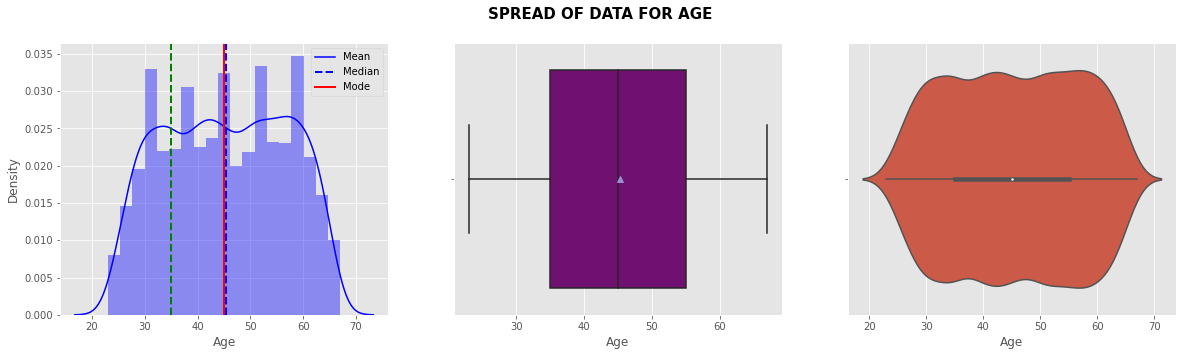

In [313]:
diff_plots(df_loan.Age)

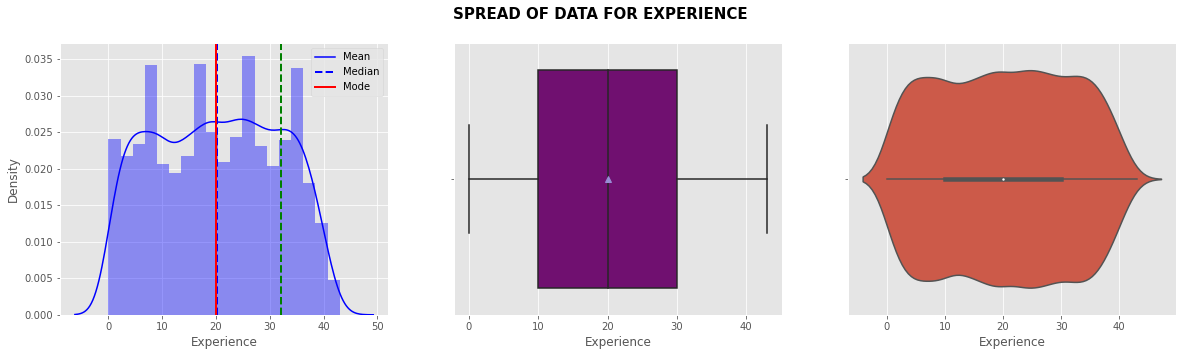

In [314]:
diff_plots(df_loan.Experience)

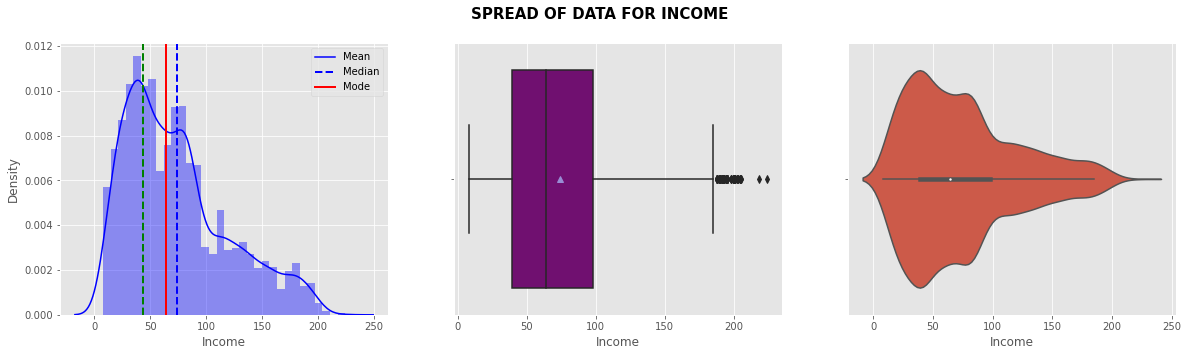

In [315]:
diff_plots(df_loan.Income)

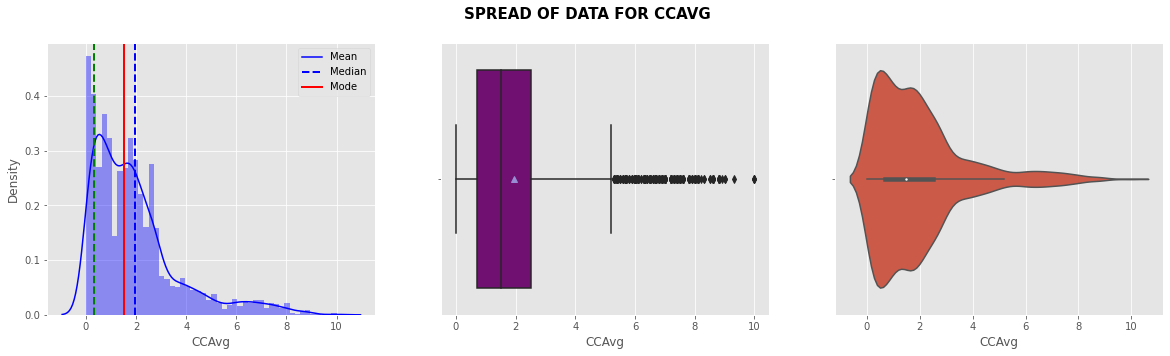

In [316]:
diff_plots(df_loan.CCAvg)

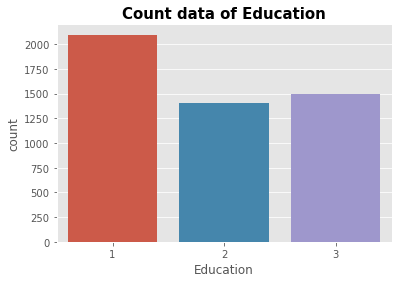

In [317]:
sns.countplot(data=df_loan, x='Education');
plt.title("Count data of Education",fontsize=15,fontweight='bold');

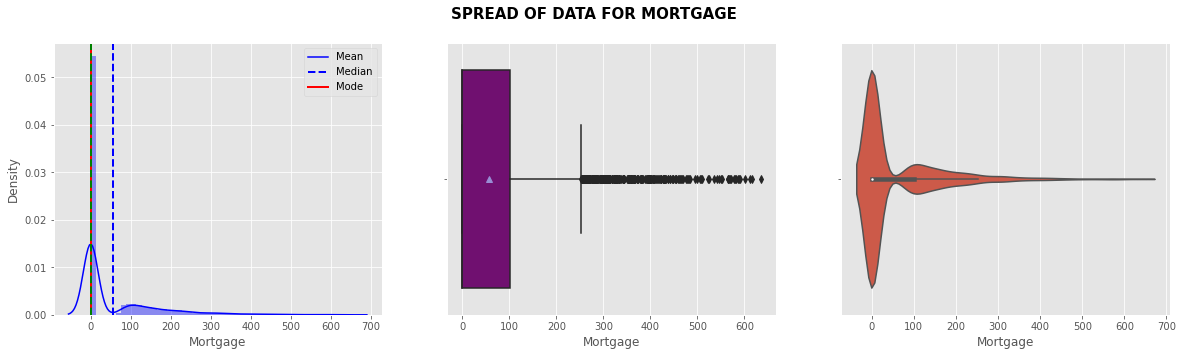

In [318]:
diff_plots(df_loan.Mortgage)

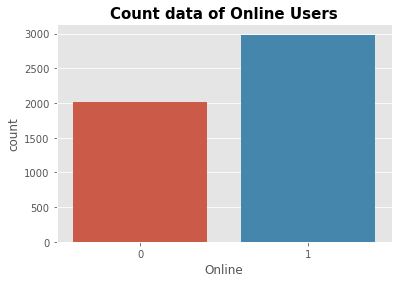

In [319]:
sns.countplot(data=df_loan, x='Online');
plt.title("Count data of Online Users",fontsize=15,fontweight='bold');

##### Inference
- Age and experience both has same distrubtion with spike at 5 points.
- Income is right skewed and has some outlier on higher side which can be clipped.
- Average montly credit is right skewed and has lot of outliers on higher side which can be clipped.
- Mortgage is  mostly 0 . but is  right skewed and has lot of outlier on higher side which can be clipped.



In [320]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  County              5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 270.2 KB


*******************************************************************************************************************************
We can try to categorize the Age into groups 

In [326]:
df_loan['Agebin'] = pd.cut(df_loan['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

*******************************************************************************************************************************
Classifying customers with respect to their income

In [321]:
df_loan["Income_group"] = pd.cut(x=df["Income"], bins=[0, 50, 140, 224],labels=["Lower", "Middle", "High"])


*******************************************************************************************************************************
Categorising customers with respect to their expenses

In [322]:
df_loan.CCAvg.describe()

count   5000.00000
mean       1.93794
std        1.74766
min        0.00000
25%        0.70000
50%        1.50000
75%        2.50000
max       10.00000
Name: CCAvg, dtype: float64

In [323]:
df_loan["Spending_group"] = pd.cut( x=df_loan["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Low", "Medium", "High"],include_lowest=True)

In [327]:
df_loan.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Income_group,Spending_group,Agebin
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0,Los Angeles County,Lower,Medium,18-30
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0,Los Angeles County,Lower,Medium,41-50
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0,Alameda County,Lower,Medium,31-40
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0,San Francisco County,Middle,High,31-40
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1,Los Angeles County,Lower,Medium,31-40


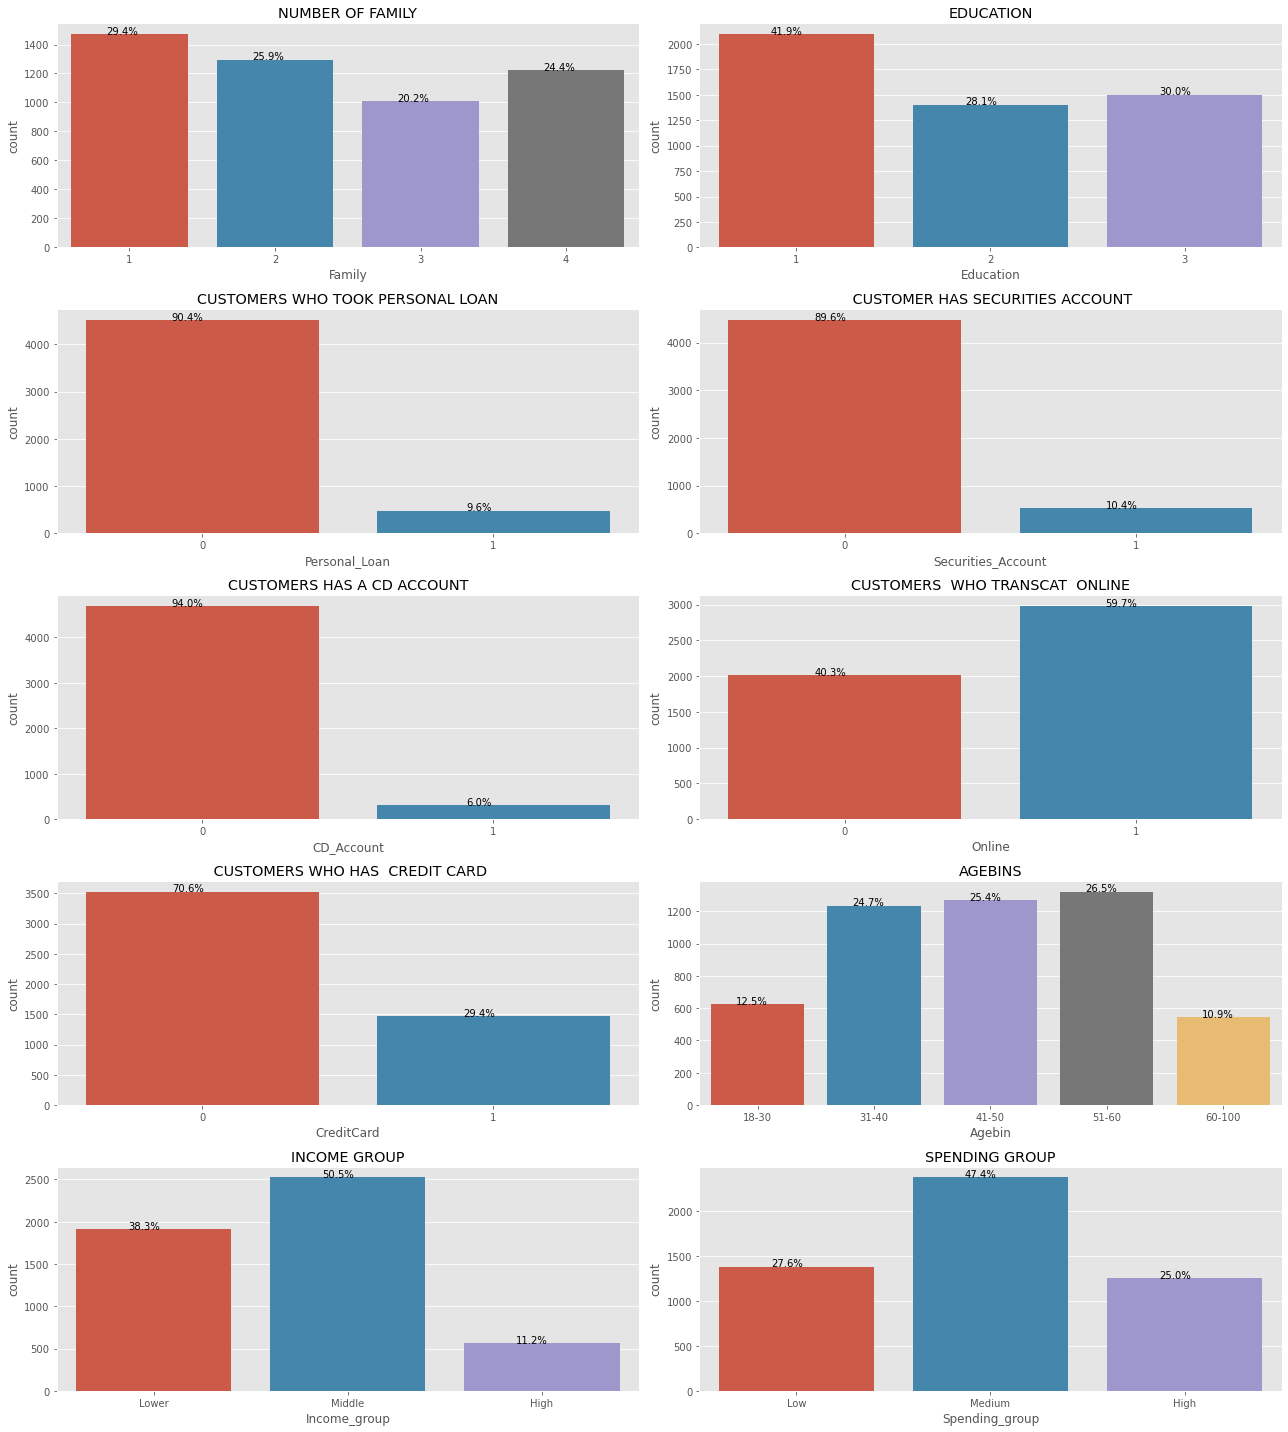

In [328]:
category_cols = ['Family','Education','Personal_Loan','Securities_Account',
               'CD_Account','Online','CreditCard','Agebin','Income_group','Spending_group']
title=['Number of Family','Education','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Agebins',"Income group",'Spending group']

plt.figure(figsize=(18,20));


for i, variable in enumerate(category_cols):
                     plt.subplot(5,2,i+1)
                     order = df_loan[variable].value_counts(ascending=False).index 
                     ax=sns.countplot(x=df_loan[variable], data=df_loan)
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_loan[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())

##### Inference

- `~29.4 %` customers are single.
- `~41.9%` customers are undergrad.
- `~9.6%` bought  a personal loan from the bank.
- `10.4 %` customers have a securities account with the bank
- `6 %` customer have a CD account.
- `60%` customers  transact online.
- `29.4%` customers have  credit cards.  
- `~ 75 %` of customers  are in range of 31- 60.
- `~ 50 %` Most of bank customers belong to middle income group.
- `~48 %` of customers has medium Average spending

In [329]:
df_loan.groupby(['County','Personal_Loan'])['Personal_Loan'].agg({'size'}).unstack()

size     
Personal_Loan             0    1
County                          
Alameda County          456   44
Butte County             17    2
Contra Costa County      73   12
El Dorado County         16    1
Fresno County            24    2
Fullerton County          5    0
Humboldt County          30    2
Imperial County           3    0
Irvine County            19    3
Kern County              47    7
Lake County               4    0
Los Angeles County      984  111
Marin County             48    6
Mendocino County          7    1
Merced County             4    0
Monterey County         113   15
Napa County               3    0
Orange County           309   30
Placer County            22    2
Riverside County         50    6
Sacramento County       169   15
San Benito County        14    0
San Bernardino County    98    3
San Diego County        509   59
San Francisco County    244   19
San Joaquin County       12    1
San Luis Obispo County   28    5
San Mateo County        192   12
Santa Barbara County    143   11
Santa Clara County      492   71
Santa Cruz County        60    8
Shasta County            15    3
Siskiyou County           7    0
Solano County            30    3
Sonoma County            22    6
Stanislaus County        14    1
Trinity County            4    0
Tuolumne County           7    0
Ventura County          104   11
Yolo County             122    8

<Figure size 1080x1728 with 0 Axes>

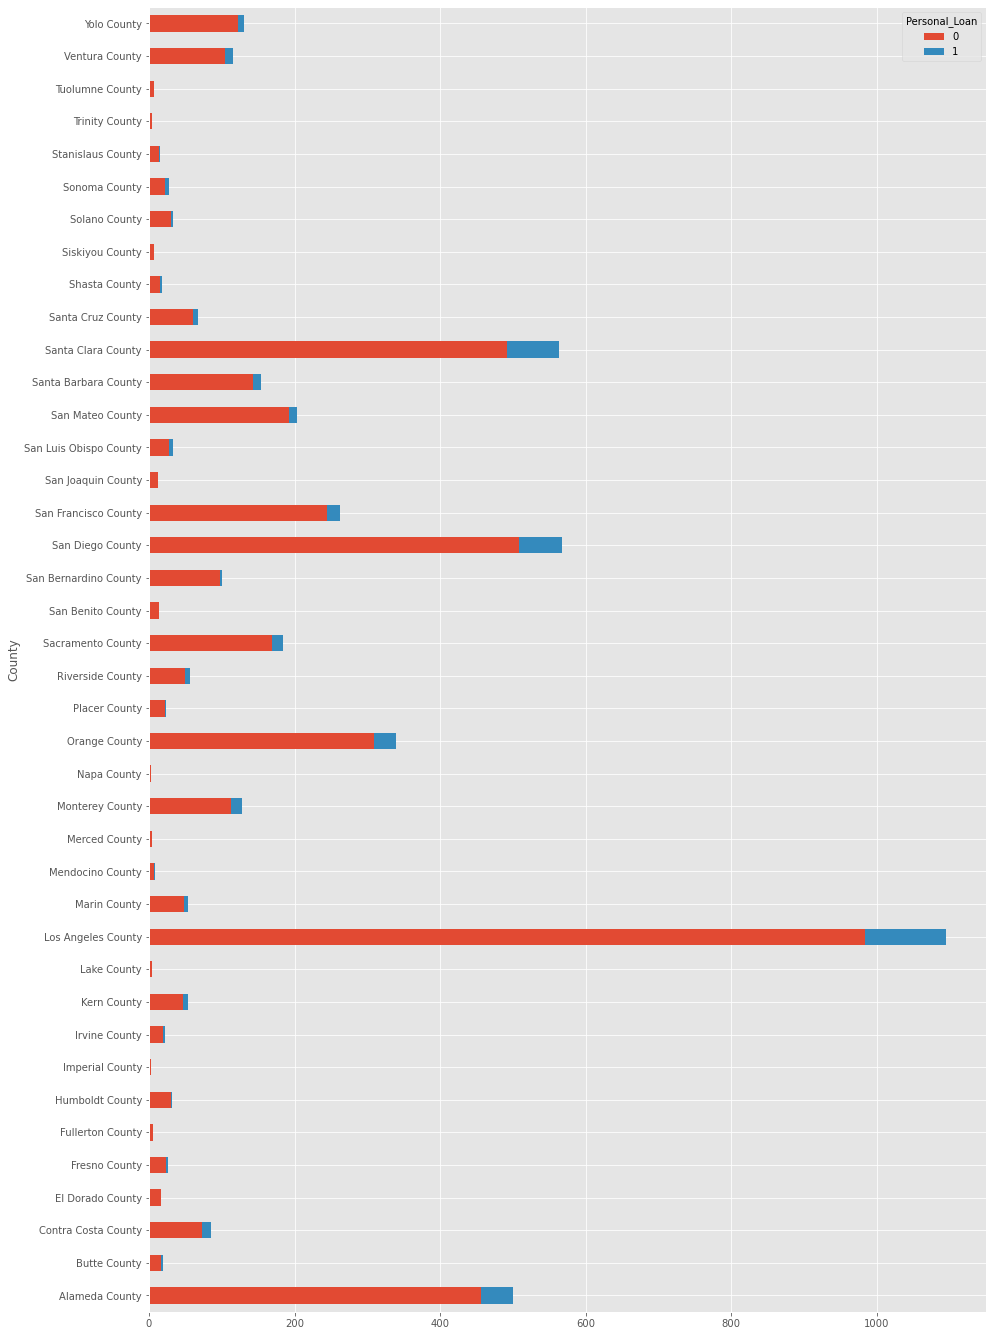

In [330]:
plt.figure(figsize=(15,24))

pd.crosstab(index=df_loan['County'],columns=df_loan['Personal_Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,24));

The counties are all part of California hence we shall divide them according to area of county

Converting the county to regions based on  http://www.seecalifornia.com/visit/californias-12-regions-and-what-they-offer.html

In [331]:
counties = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',             
'San Bernardino County':'Southern',       
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',           
'Riverside County':'Southern',            
'Kern County':'Southern',                 
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',     
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',               
'Placer County':'Central',                
'Butte County':'Superior',               
'Shasta County':'Superior',                
'El Dorado County':'Central',             
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',           
'Mendocino County':'Superior',             
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                 
'Napa County':'Bay Area',                   
'Imperial County':'Southern',
'Ventura County':'Southern',
'San Fransisco County':'Bay Area',
'Fullerton County':'Southern',
'Irvine County':'Southern'
}

In [332]:
df_loan['Regions'] = df_loan['County'].map(counties)

In [333]:
df_loan['Regions'].unique()

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior',
       'Central'], dtype=object)

In [334]:
df_loan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
County                0
Income_group          0
Spending_group        0
Agebin                0
Regions               0
dtype: int64

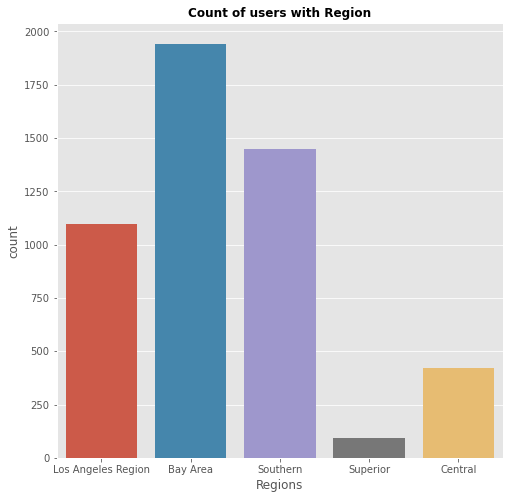

In [335]:
plt.figure(figsize=(8,8))
sns.countplot(data=df_loan,x=df_loan['Regions']);
plt.title("Count of users with Region",fontsize=12,fontweight='bold');

### Bivariate & Multivariate Analysis

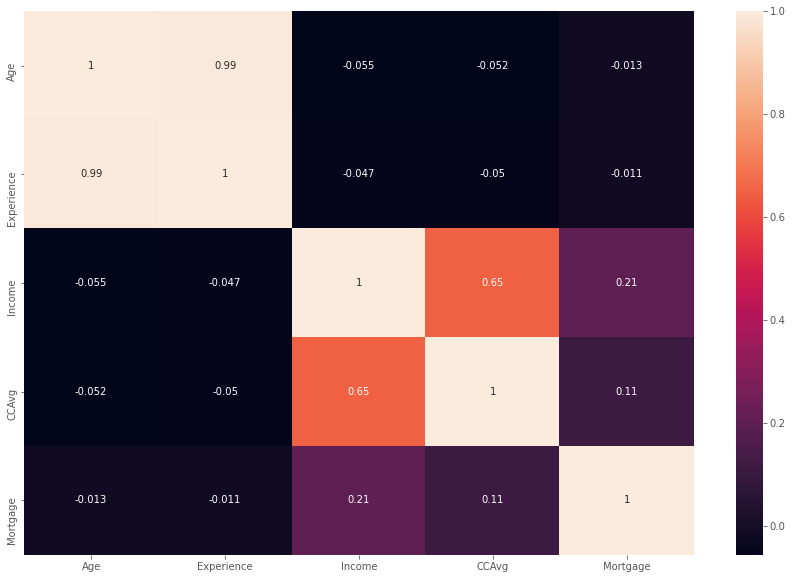

In [336]:
plt.figure(figsize=(15,10))
sns.heatmap(df_loan.corr(),annot=True)
plt.show()

##### Inference
- As expected Age and experience are highly correlated and one of them can be dropped.Since we had to handle 0, will drop experience.
- Income and Average spending on  credit card are  positively corrleated.
- Mortgage has very little correlation with income.


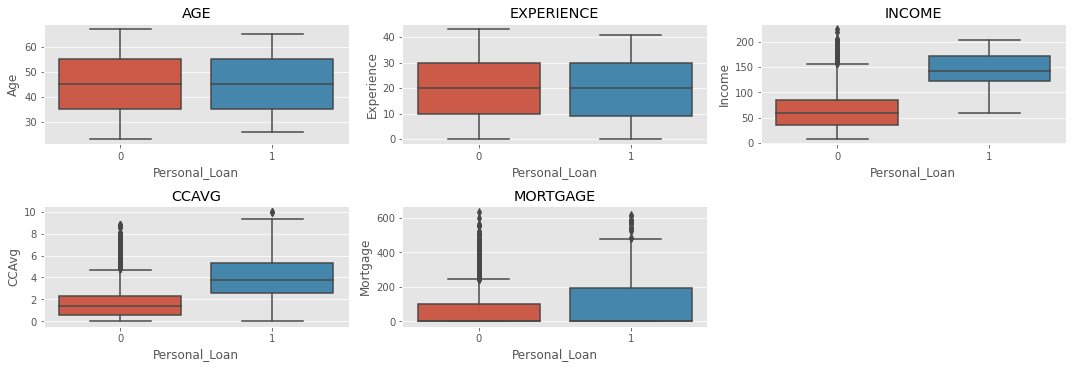

In [337]:
numerical_columns = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(15,25))


for i, variable in enumerate(numerical_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot( data=df_loan,x='Personal_Loan',y= df_loan[variable])
        plt.tight_layout()
        plt.title(variable.upper())

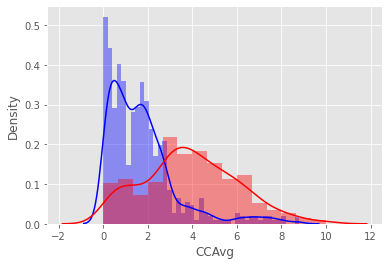

In [338]:
sns.distplot( df_loan[df_loan['Personal_Loan'] == 0]['CCAvg'], color = 'b');
sns.distplot( df_loan[df_loan['Personal_Loan'] == 1]['CCAvg'], color = 'r');

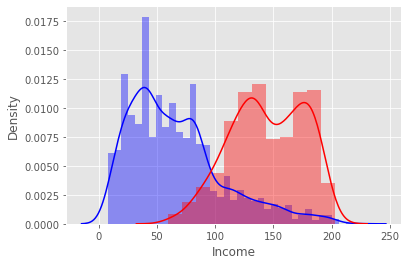

In [339]:
sns.distplot( df_loan[df_loan['Personal_Loan'] == 0]['Income'], color = 'b');
sns.distplot( df_loan[df_loan['Personal_Loan'] == 1]['Income'], color = 'r');

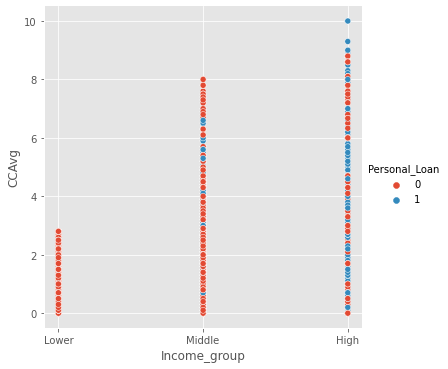

In [340]:
sns.relplot(x='Income_group',y='CCAvg',hue='Personal_Loan',data=df_loan);

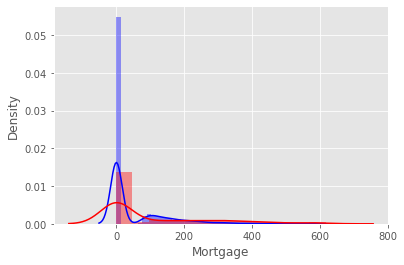

In [341]:
sns.distplot( df_loan[df_loan['Personal_Loan'] == 0]['Mortgage'], color = 'b');
sns.distplot( df_loan[df_loan['Personal_Loan'] == 1]['Mortgage'], color = 'r');

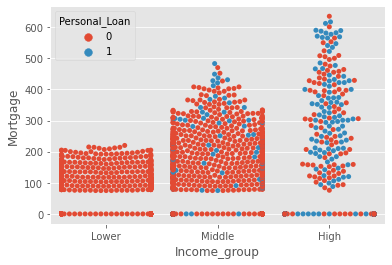

In [342]:
sns.swarmplot(data=df_loan,x='Income_group',y='Mortgage',hue='Personal_Loan');

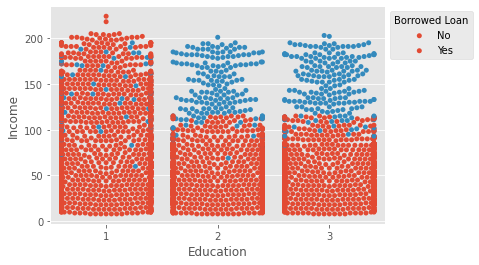

In [343]:
sns.swarmplot(x='Education',y='Income',hue='Personal_Loan',data=df_loan);
labels=["No","Yes"]
plt.legend(loc='lower left', frameon=False)
plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))

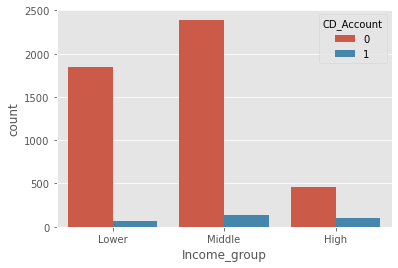

In [344]:
sns.countplot(data=df_loan,x='Income_group',hue='CD_Account');

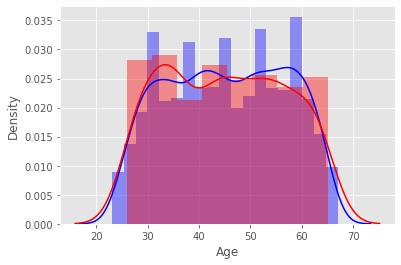

In [345]:
sns.distplot( df_loan[df_loan['Personal_Loan'] == 0]['Age'], color = 'b');
sns.distplot( df_loan[df_loan['Personal_Loan'] == 1]['Age'], color = 'r');

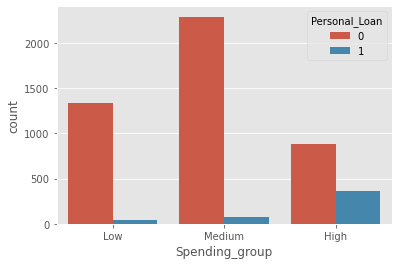

In [346]:
sns.countplot(x='Spending_group',hue='Personal_Loan',data=df_loan);

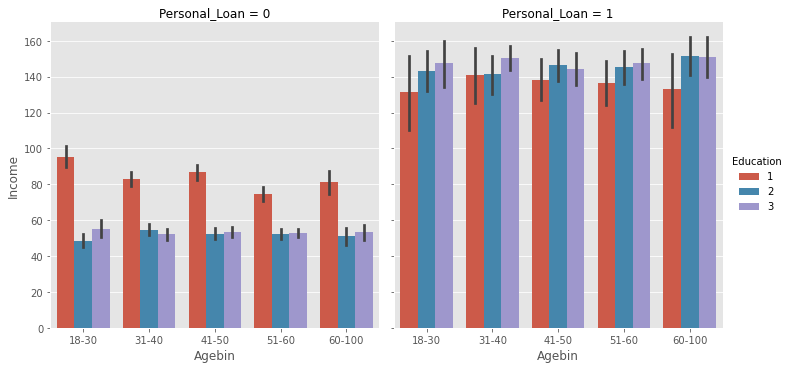

In [347]:
sns.catplot(data=df_loan,y='Income',x='Agebin',hue='Education',kind='bar',col="Personal_Loan");

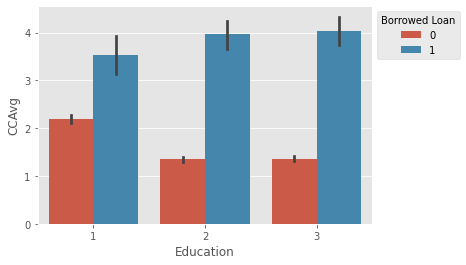

In [348]:
sns.barplot(y='CCAvg',x='Education', hue='Personal_Loan',data=df_loan);
labels=["No","Yes"]
plt.legend(loc="upper left", title="Borrowed Loan",bbox_to_anchor=(1,1));


### Inference

* We can see that people with more education has a higher credit card usage and they are used to more borrowing of loans.
* The loan borrowing tendancy is with higher income people.
* People with large mortgages took out loans.

In [349]:
def stacked_plot(x):
    sns.set_palette(sns.color_palette("Set2", 8))
    tab1 = pd.crosstab(x,df_loan['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df_loan['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))
    plt.show()

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


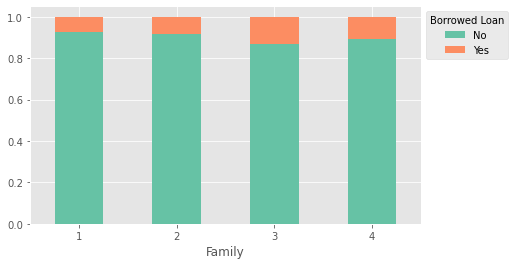

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


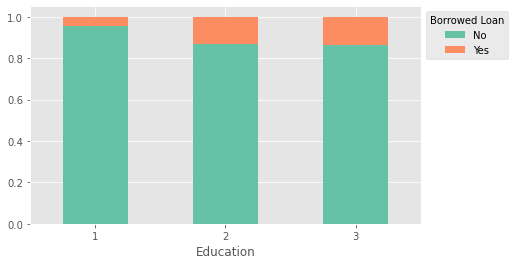

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


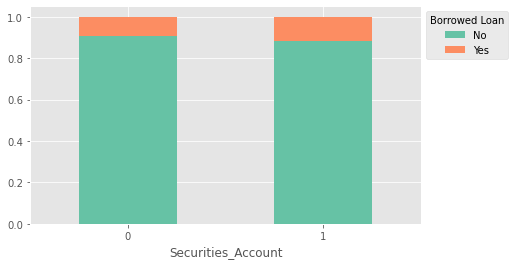

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


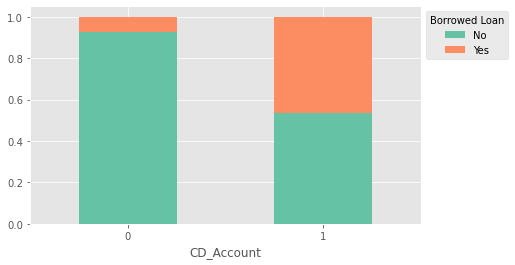

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


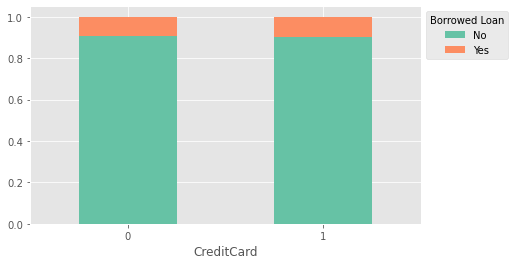

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


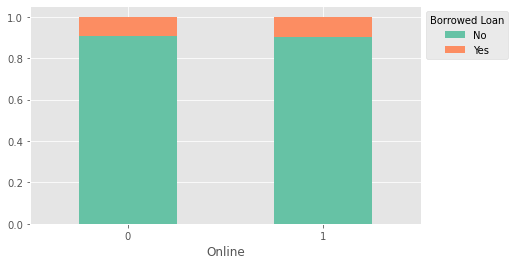

Personal_Loan          0    1   All
Regions                            
Bay Area            1747  196  1943
Central              390   30   420
Los Angeles Region   984  111  1095
Southern            1315  135  1450
Superior              84    8    92
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


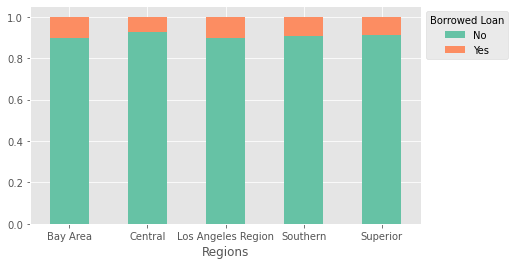

Personal_Loan     0    1   All
Agebin                        
18-30           558   66   624
31-40          1118  118  1236
41-50          1148  122  1270
51-60          1208  115  1323
60-100          488   59   547
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


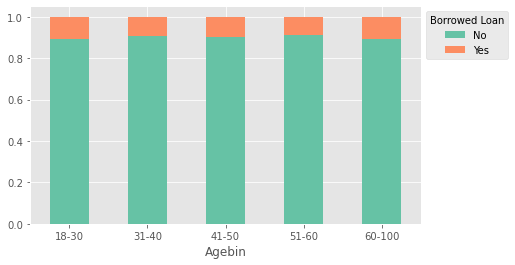

Personal_Loan     0    1   All
Income_group                  
Lower          1914    0  1914
Middle         2301  223  2524
High            305  257   562
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


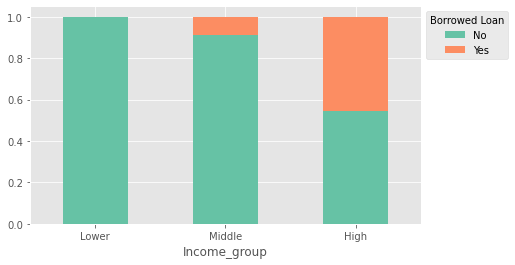

Personal_Loan      0    1   All
Spending_group                 
Low             1342   39  1381
Medium          2292   79  2371
High             886  362  1248
All             4520  480  5000
------------------------------------------------------------------------------------------------------------------------


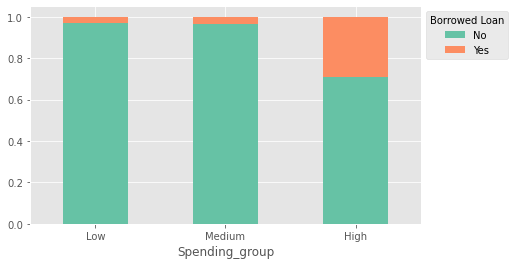

In [350]:
cat_columns=['Family','Education','Securities_Account','CD_Account','CreditCard','Online','Regions','Agebin','Income_group','Spending_group']
for i, variable in enumerate(cat_columns):
       stacked_plot(df_loan[variable])

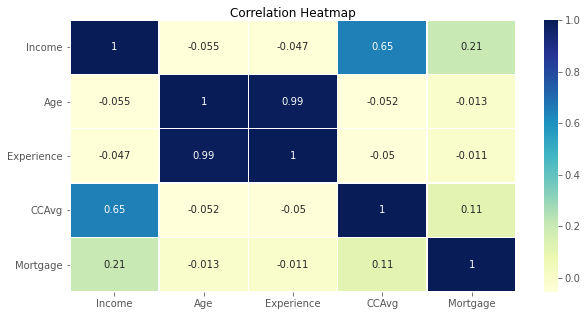

In [351]:
plt.figure(figsize=(10,5))
numerical=['Income','Age','Experience','CCAvg','Mortgage']


heatmap = sns.heatmap(df_loan[numerical].corr(), annot=True, cmap='YlGnBu',linewidths=0.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=2);

*******************************************************************************************************************************
### Inference
* We can see that people with size of 3 and 4 have the highest borrowings.
* Most people have more than 1 year of education. 
* We can see that 60 people who borrowes loan had Securities Account as well.
* 140 people who borrowed loan also had CD Account.
* The impact of online users does not have much impact on Personal loan.
* The majority of consumers who had a personal loan with the bank did not utilise other banks' CrediCards.
* Customers from Los Angeles and the Bay Area make up the majority of those who have previously taken out a personal loan.
* Customers aged 30 and under, as well as those aged 60 and up, have a high borrowing loan ratio.
* Customers with a high average monthly spending have previously purchased a personal loan.
* Age and experience are significantly associated with 0.99 correlation, as expected, and one of them can be eliminated. Dropping experience would be a better alternative because it had negative values.
*******************************************************************************************************************************

In [352]:
df_loan.Personal_Loan.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

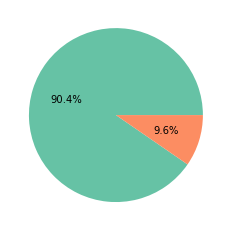

In [353]:
plt.pie(data=df_loan,x=df_loan["Personal_Loan"].value_counts(),autopct='%1.1f%%');

In [354]:
df_loan.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Income_group,Spending_group,Agebin,Regions
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0,Los Angeles County,Lower,Medium,18-30,Los Angeles Region
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0,Los Angeles County,Lower,Medium,41-50,Los Angeles Region
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0,Alameda County,Lower,Medium,31-40,Bay Area
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0,San Francisco County,Middle,High,31-40,Bay Area
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1,Los Angeles County,Lower,Medium,31-40,Los Angeles Region


In [355]:
df_loan1 = df_loan.copy()

In [356]:
df_loan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  County              5000 non-null   category
 14  Income_group        5000 non-null   category
 15  Spending_group      5000 non-null   ca

## Insights based on EDA

### Data Description:

* Personal loan, a categorical data type, is the dependent variable.
* Age, Experience, Income, Mortgage, and CCavg are all integer variables, whereas the rest are categorical.
* In the dataset, there were no missing values.


### Inference from EDA:
* Customers who have chosen a loan have a higher average monthly credit consumption.
* The majority of consumers who had a personal loan with the bank took advantage of the bank's online services.
* Customers with a family of three had taken out loans from the bank.
* The majority of consumers who have previously taken out a personal loan are from the Los Angeles area.
* Personal loans had previously been used by people with higher income.
* Customers aged 30 and under, as well as those aged 60 and up, have a high borrowing loan ratio.
* People with large mortgages took out loans.
* Customers who possessed a bank certificate of deposit had previously taken out a loan.


### Data Cleaning:
* We saw that some findings were negative, but because there was such a high link with age, we eliminate experience.
* There are 450 different zip codes, which we linked to counties. They were then mapped to areas to decrease the number of dimensions in the data, resulting in only 5 different values-Superior, Central, Bay Area, Southern, and Los Angeles.
* We also developed an Age bin, a Spending group, and an Income group to see if there was a pattern in loan purchases depending on these factors.
* There are variables with many outliers which needs to be processed.

### Customer segmentation for borrowing  loan based on EDA
* Customers with lesser incomes have fewer mortgages and spend less money on a monthly basis. They are our low-key customers.
* Few customers in the medium income group have bigger mortgages and spend less on their credit cards on a monthly basis. They are clients with a typical profile.
* Customers with a greater income possess higher monthly average spending and larger mortgages. They also hold a bank certificate of deposit. These are high-profile customers.
 

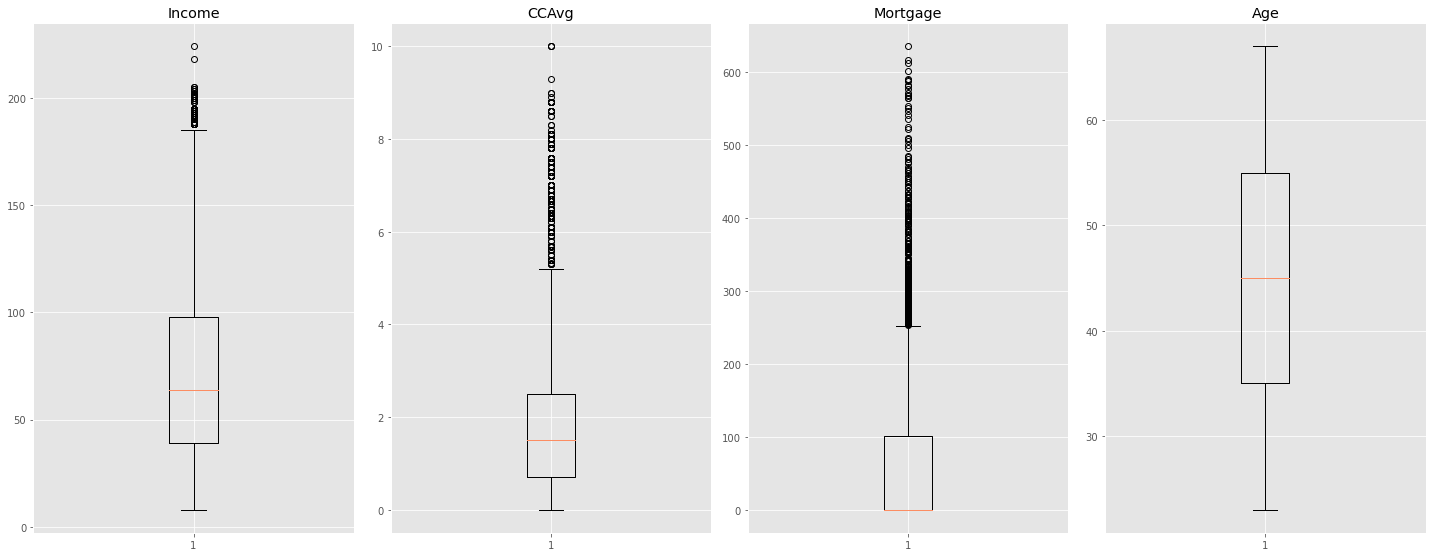

In [357]:
#Lets find out outliers of the variables first with spread of data with boxplot

numeric_columns =['Income','CCAvg','Mortgage','Age']
plt.figure(figsize=(20,30))
for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df_loan[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [358]:
df_loan.sort_values(by=["Income"],ascending = False).head(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Income_group,Spending_group,Agebin,Regions
3896,48,24,224,93940,2,6.67000,1,0,0,0,1,1,1,Monterey County,High,High,41-50,Bay Area
4993,45,21,218,91801,2,6.67000,1,0,0,0,0,1,0,Los Angeles County,High,High,41-50,Los Angeles Region
526,26,2,205,93106,1,6.33000,1,271,0,0,0,0,1,Santa Barbara County,High,High,18-30,Southern
2988,46,21,205,95762,2,8.80000,1,181,0,1,0,1,0,El Dorado County,High,High,41-50,Central
4225,43,18,204,91902,2,8.80000,1,0,0,0,0,1,0,San Diego County,High,High,41-50,Southern
677,46,21,204,92780,2,2.80000,1,0,0,0,0,1,0,Orange County,High,High,41-50,Southern
2278,30,4,204,91107,2,4.50000,1,0,0,0,0,1,0,Los Angeles County,High,High,18-30,Los Angeles Region
3804,47,22,203,95842,2,8.80000,1,0,0,0,0,1,0,Sacramento County,High,High,41-50,Central
2101,35,5,203,95032,1,10.00000,3,0,1,0,0,0,0,Santa Clara County,High,High,31-40,Bay Area
787,45,15,202,91380,3,10.00000,3,0,1,0,0,0,0,Los Angeles County,High,High,41-50,Los Angeles Region


**Income**
- We can see the maximum outliers in income. 
- The median of Income = 64
- The mean = 73, this did suggest that there are outliers.
- The highest values ranges from 200 to 224.

In [359]:
df_loan.loc[(df_loan['Age']==48) & (df_loan['Experience']==24)].sort_values(by=['Income'],ascending=False).head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Income_group,Spending_group,Agebin,Regions
3896,48,24,224,93940,2,6.67000,1,0,0,0,1,1,1,Monterey County,High,High,41-50,Bay Area
196,48,24,165,93407,1,5.00000,1,0,0,0,0,0,1,San Luis Obispo County,High,High,41-50,Southern
2217,48,24,162,91355,4,3.30000,2,446,1,0,1,1,0,Los Angeles County,High,High,41-50,Los Angeles Region
4629,48,24,148,91311,2,3.30000,1,0,0,0,1,1,1,Los Angeles County,High,High,41-50,Los Angeles Region
4167,48,24,144,94025,4,3.50000,2,0,1,0,0,0,0,San Mateo County,High,High,41-50,Bay Area


In [360]:
df_loan.sort_values(by=["Mortgage"],ascending = False).head(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Income_group,Spending_group,Agebin,Regions
2934,37,13,195,91763,2,6.50000,1,635,0,0,0,1,0,San Bernardino County,High,High,31-40,Southern
303,49,25,195,95605,4,3.00000,1,617,1,0,0,0,0,Yolo County,High,High,41-50,Central
4812,29,4,184,92126,4,2.20000,3,612,1,0,0,1,0,San Diego County,High,Medium,18-30,Southern
1783,53,27,192,94720,1,1.70000,1,601,0,0,0,1,0,Alameda County,High,Medium,51-60,Bay Area
4842,49,23,174,95449,3,4.60000,2,590,1,0,0,0,0,Mendocino County,High,High,41-50,Superior
1937,51,25,181,95051,1,3.30000,3,589,1,1,1,1,0,Santa Clara County,High,High,51-60,Bay Area
782,54,30,194,92056,3,6.00000,3,587,1,1,1,1,1,San Diego County,High,High,51-60,Southern
2769,33,9,183,91320,2,8.80000,3,582,1,0,0,1,0,Ventura County,High,High,31-40,Southern
4655,33,7,188,95054,2,7.00000,2,581,1,0,0,0,0,Santa Clara County,High,High,31-40,Bay Area
4345,26,1,184,94608,2,4.20000,3,577,1,0,1,1,1,Alameda County,High,High,18-30,Bay Area


In [361]:
df_loan.sort_values(by=["Mortgage"],ascending = True).head(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Income_group,Spending_group,Agebin,Regions
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0,Los Angeles County,Lower,Medium,18-30,Los Angeles Region
3093,29,5,34,90717,4,0.40000,2,0,0,0,0,0,1,Los Angeles County,Lower,Low,18-30,Los Angeles Region
3095,49,25,43,94109,1,1.60000,2,0,0,0,0,1,1,San Francisco County,Lower,Medium,41-50,Bay Area
3096,43,18,179,94108,3,1.20000,1,0,1,1,1,1,0,San Francisco County,High,Medium,41-50,Bay Area
3097,58,32,44,92182,3,2.20000,3,0,0,0,0,0,0,San Diego County,Lower,Medium,51-60,Southern
3098,41,16,21,92024,2,0.10000,2,0,0,0,0,0,0,San Diego County,Lower,Low,41-50,Southern
3100,52,27,81,90024,4,3.80000,2,0,0,0,0,0,1,Los Angeles County,Middle,High,51-60,Los Angeles Region
3101,55,31,91,93555,2,2.80000,1,0,0,0,0,0,0,Kern County,Middle,High,51-60,Southern
3102,49,25,30,90095,4,0.90000,2,0,0,0,0,0,1,Los Angeles County,Lower,Medium,41-50,Los Angeles Region
3103,52,22,55,92129,3,1.40000,3,0,0,0,0,1,0,San Diego County,Middle,Medium,51-60,Southern


**Mortgage**
- Mean = 57
- Median = 0
- This means there are many outliers in the data. 
- We can see the extreme values in the ascending its is all 0 but in the highest range it is varying from 570 to 635.

In [362]:
df_loan.sort_values(by=["CCAvg"],ascending = False).head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Income_group,Spending_group,Agebin,Regions
787,45,15,202,91380,3,10.00000,3,0,1,0,0,0,0,Los Angeles County,High,High,41-50,Los Angeles Region
2101,35,5,203,95032,1,10.00000,3,0,1,0,0,0,0,Santa Clara County,High,High,31-40,Bay Area
2337,43,16,201,95054,1,10.00000,2,0,1,0,0,0,1,Santa Clara County,High,High,41-50,Bay Area
3943,61,36,188,91360,1,9.30000,2,0,1,0,0,0,0,Ventura County,High,High,60-100,Southern
3822,63,33,178,91768,4,9.00000,3,0,1,0,0,0,0,Los Angeles County,High,High,60-100,Los Angeles Region


In [363]:
df_loan.sort_values(by=["CCAvg"],ascending = True).head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Income_group,Spending_group,Agebin,Regions
2565,40,15,10,94708,2,0.00000,3,102,0,0,0,1,0,Alameda County,Lower,Low,31-40,Bay Area
1904,38,14,91,95060,2,0.00000,1,0,0,0,0,1,0,Santa Cruz County,Middle,Low,31-40,Bay Area
2457,42,17,19,92115,2,0.00000,3,85,0,0,0,1,1,San Diego County,Lower,Low,41-50,Southern
4098,27,3,75,90032,4,0.00000,1,0,0,0,0,0,0,Los Angeles County,Middle,Low,18-30,Los Angeles Region
4084,60,36,59,94124,1,0.00000,2,0,0,1,0,0,0,San Francisco County,Middle,Low,51-60,Bay Area


When compared to people of the same age and experience, this salary of 224K USD is extremely high. The credit card and mortgage values appear to be correct. We can determine whether or not to remove/treat outliers after discovering them.

In [364]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  County              5000 non-null   category
 14  Income_group        5000 non-null   category
 15  Spending_group      5000 non-null   ca

In [365]:
df_loan.drop(columns=["Agebin", "ZIPCode","County",'Experience','Income_group','Spending_group'], inplace=True)

In [366]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Income              5000 non-null   int64   
 2   Family              5000 non-null   category
 3   CCAvg               5000 non-null   float64 
 4   Education           5000 non-null   category
 5   Mortgage            5000 non-null   int64   
 6   Personal_Loan       5000 non-null   category
 7   Securities_Account  5000 non-null   category
 8   CD_Account          5000 non-null   category
 9   Online              5000 non-null   category
 10  CreditCard          5000 non-null   category
 11  Regions             5000 non-null   object  
dtypes: category(7), float64(1), int64(3), object(1)
memory usage: 230.4+ KB


**Integer variables:**
Age, Income, CCAvg, Mortgage

**Category variables:**
- Family (binary)
- Personal Loan (binary)
- Securites Account (binary)
- CD Account (binary)
- Online (binary)
- Credit Card (binary)
- Education
- Regions 
Hence we will make dummies for Education and Regions

In [367]:
X = df_loan.drop(['Personal_Loan'], axis=1)
Y = df_loan['Personal_Loan']

oneHotCols=['Regions','Education']
X=pd.get_dummies(X,columns=oneHotCols,drop_first=True)

###### Splitting data in train and test sets

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1,stratify=Y)
# if not specified as 0.3 or else it would be 0.25

In [369]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))


# Model building Logistic Regression

#### Model can make wrong predictions as:
* Predicting a person will buy a loan but he actually doesn't.(Loss of Resource)
* Predicting a person will not buy a loan but he actually does.(Loss of Opportunity)

In [370]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()
   

In [371]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,statsklearn,threshold=0.5,flag=True,roc=False):
    
    score_list=[] 
    if statsklearn==0:
        pred_train = model.predict(X_train_df)
        pred_test = model.predict(X_test_df)
    else:
        pred_train = (model.predict(X_train_df)>threshold)
        pred_test = (model.predict(X_test_df)>threshold)
    
    
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
      
    if flag == True: 
        print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
        print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",
              round(accuracy_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(accuracy_score(y_test_pass,pred_test),3))
        print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m"
              ,round(recall_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m" ,
              round(recall_score(y_test_pass,pred_test),3))
        
        print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m",
              round(precision_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(precision_score(y_test_pass,pred_test),3))
        print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",
              round(f1_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m",
              round(f1_score(y_test_pass,pred_test),3))
        make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
        make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
   
    if roc == True:
        
        print("\x1b[0;30;47m \033[1mROC-AUC Score  :Train:\x1b[0m: ",
              round(roc_auc_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m: ",
              round(roc_auc_score(y_test_pass,pred_test),3))
    
    return score_list # returning the list with train and test scores

In [372]:
# # defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     ##'''Add scores to list so that we can compare all models score together'''##   
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

##### Logistic Regression

 MODEL PERFORMANCE
 Accuracy   : Train: 0.655  Test:  0.654
 Recall     : Train: 0.985  Test: 0.972
 Precision  : Train: 0.216  Test:  0.214
 F1         : Train: 0.354  Test: 0.35


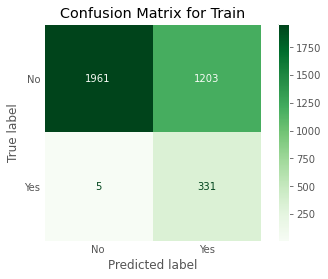

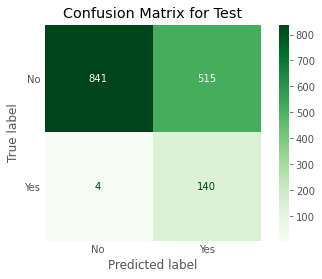

In [373]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False,class_weight={0:0.15,1:0.85})
model  = lr.fit(X_train_scaled_df,y_train)

statmodel=0  #0 for sklearn and 1 for statmodel

# Let's check model performances for this model
scores_Sklearn = get_metrics_score(model,X_train_scaled_df,X_test_scaled_df,y_train,y_test,statmodel)


In [374]:
add_score_model(scores_Sklearn)

##### Logistic Regression (with Statmodel)

Optimization terminated successfully.
         Current function value: 0.107807
         Iterations 10
 MODEL PERFORMANCE
 Accuracy   : Train: 0.961  Test:  0.955
 Recall     : Train: 0.699  Test: 0.639
 Precision  : Train: 0.87  Test:  0.852
 F1         : Train: 0.776  Test: 0.73


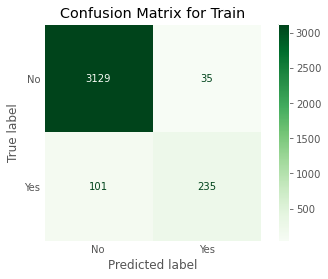

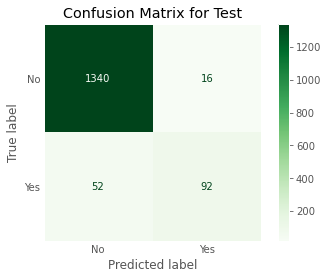

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3484
Method:                           MLE   Df Model:                           15
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6591
Time:                        17:46:57   Log-Likelihood:                -377.33
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                3.729e-302
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.4340      0.247    -21.999      0.000      -5.918      -4.950
Age                            0.2049      0.098      2.083      0.037       0.012       0.398
Income                         3.1304      0.183     17.064      0.000       2.771       3.490
Family                         0.7080      0.109      6.510      0.000       0.495       0.921
CCAvg                          0.1936      0.097      1.991      0.046       0.003       0.384
Mortgage                       0.1049      0.076      1.386      0.166      -0.043       0.253
Securities_Account            -0.3143      0.117     -2.689      0.007      -0.543      -0.085
CD_Account                     0.8979      0.105      8.585      0.000       0.693       1.103
Online                        -0.3449      0.102     -3.393      0.001      -0.544      -0.146
CreditCard                    -0.4773      0.122     -3.921      0.000      -0.716      -0.239
Regions_Central               -0.1976      0.118     -1.681      0.093      -0.428       0.033
Regions_Los Angeles Region    -0.0564      0.105     -0.538      0.590      -0.262       0.149
Regions_Southern               0.0321      0.105      0.305      0.761      -0.174       0.239
Regions_Superior              -0.2416      0.183     -1.317      0.188      -0.601       0.118
Education_2                    2.0080      0.156     12.907      0.000       1.703       2.313
Education_3                    2.0808      0.158     13.192      0.000       1.772       2.390
==============================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [375]:
X_train_stat = sm.add_constant(X_train_scaled_df)
X_test_stat = sm.add_constant(X_test_scaled_df)
statmodel=1  
logit = sm.Logit( y_train, X_train_stat.astype(float) )
lg = logit.fit(warn_convergence=False)

scores_statmodel = get_metrics_score(lg,X_train_stat,X_test_stat,y_train,y_test,statmodel)
lg.summary() 

### Test Assumption

#### Multi Collinearity
Multicollinearity refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related. Multicollinearity occurs when the model includes multiple factors that are correlated not just to the target variable, but also to each other.
We will have to  check and remove multicollinearity from the data to get reliable coefficients and p-values. The Variation Inflation Factor is one of several methods for discovering (or assessing) multi-collinearity.
- If VIF is 1 then there is no correlation among the predictor and the remaining predictor variables.
- If VIF exceeds 5, it shows signs of high multi-collinearity.

In [376]:
X_train_num = X_train_stat.astype(float).copy()

In [377]:
vif_series1 = pd.Series([variance_inflation_factor(X_train_num.values,i) for i in range(X_train_num.shape[1])],index=X_train_num.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                        1.00000
Age                          1.01481
Income                       1.81950
Family                       1.05029
CCAvg                        1.68313
Mortgage                     1.05029
Securities_Account           1.14038
CD_Account                   1.33039
Online                       1.04707
CreditCard                   1.10602
Regions_Central              1.11837
Regions_Los Angeles Region   1.21651
Regions_Southern             1.23682
Regions_Superior             1.03248
Education_2                  1.25000
Education_3                  1.23914
dtype: float64



Since we can see that all the correlation is near '1', hence there is no multi collinearity.

In [378]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3484
Method:                           MLE   Df Model:                           15
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6591
Time:                        17:47:47   Log-Likelihood:                -377.33
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                3.729e-302
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.4340      0.247    -21.999      0.000      -5.918      -4.950
Age                            0.2049      0.098      2.083      0.037       0.012       0.398
Income                         3.1304      0.183     17.064      0.000       2.771       3.490
Family                         0.7080      0.109      6.510      0.000       0.495       0.921
CCAvg                          0.1936      0.097      1.991      0.046       0.003       0.384
Mortgage                       0.1049      0.076      1.386      0.166      -0.043       0.253
Securities_Account            -0.3143      0.117     -2.689      0.007      -0.543      -0.085
CD_Account                     0.8979      0.105      8.585      0.000       0.693       1.103
Online                        -0.3449      0.102     -3.393      0.001      -0.544      -0.146
CreditCard                    -0.4773      0.122     -3.921      0.000      -0.716      -0.239
Regions_Central               -0.1976      0.118     -1.681      0.093      -0.428       0.033
Regions_Los Angeles Region    -0.0564      0.105     -0.538      0.590      -0.262       0.149
Regions_Southern               0.0321      0.105      0.305      0.761      -0.174       0.239
Regions_Superior              -0.2416      0.183     -1.317      0.188      -0.601       0.118
Education_2                    2.0080      0.156     12.907      0.000       1.703       2.313
Education_3                    2.0808      0.158     13.192      0.000       1.772       2.390
==============================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Let's try eliminating the ones with high p-values like Region, Mortgage, and Age.

In [379]:
X_train1 = X_train_stat.drop(['Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'], axis = 1)
X_test1= X_test_stat.drop(['Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'], axis = 1)
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(warn_convergence =False)

lg1.summary()

Optimization terminated successfully.
         Current function value: 0.108646
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6564
Time:                        17:47:53   Log-Likelihood:                -380.26
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                4.623e-305
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.3841      0.243    -22.186      0.000      -5.860      -4.908
Age                    0.2045      0.098      2.089      0.037       0.013       0.396
Income                 3.1097      0.181     17.144      0.000       2.754       3.465
Family                 0.7006      0.108      6.479      0.000       0.489       0.913
CCAvg                  0.1986      0.096      2.058      0.040       0.009       0.388
Mortgage               0.0991      0.075      1.320      0.187      -0.048       0.246
Securities_Account    -0.3036      0.116     -2.609      0.009      -0.532      -0.076
CD_Account             0.9005      0.104      8.659      0.000       0.697       1.104
Online                -0.3596      0.101     -3.548      0.000      -0.558      -0.161
CreditCard            -0.4864      0.121     -4.008      0.000      -0.724      -0.249
Education_2            1.9967      0.155     12.920      0.000       1.694       2.300
Education_3            2.0708      0.157     13.189      0.000       1.763       2.379
======================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [380]:
 X_train2 = X_train1.drop(['Mortgage'], axis = 1)
 X_test2= X_test1.drop(['Mortgage'], axis = 1)
 logit2 = sm.Logit(y_train, X_train2.astype(float))
 lg2 = logit2.fit()
 lg2.summary()

Optimization terminated successfully.
         Current function value: 0.108894
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6556
Time:                        17:48:02   Log-Likelihood:                -381.13
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                8.857e-306
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.3757      0.242    -22.213      0.000      -5.850      -4.901
Age                    0.1988      0.098      2.035      0.042       0.007       0.390
Income                 3.1263      0.181     17.282      0.000       2.772       3.481
Family                 0.7038      0.108      6.508      0.000       0.492       0.916
CCAvg                  0.1871      0.096      1.946      0.052      -0.001       0.375
Securities_Account    -0.3075      0.116     -2.648      0.008      -0.535      -0.080
CD_Account             0.9089      0.104      8.749      0.000       0.705       1.113
Online                -0.3561      0.101     -3.522      0.000      -0.554      -0.158
CreditCard            -0.4887      0.121     -4.035      0.000      -0.726      -0.251
Education_2            1.9877      0.154     12.899      0.000       1.686       2.290
Education_3            2.0648      0.157     13.174      0.000       1.758       2.372
======================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [381]:
 X_train3 = X_train2.drop(['Age'], axis = 1)
 X_test3= X_test2.drop(['Age'], axis = 1)
 logit3 = sm.Logit(y_train, X_train3.astype(float))
 lg3 = logit3.fit()
 lg3.summary()

Optimization terminated successfully.
         Current function value: 0.109490
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6537
Time:                        17:48:07   Log-Likelihood:                -383.21
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                5.402e-306
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.3394      0.239    -22.332      0.000      -5.808      -4.871
Income                 3.1014      0.179     17.330      0.000       2.751       3.452
Family                 0.6920      0.108      6.410      0.000       0.480       0.904
CCAvg                  0.1616      0.096      1.687      0.092      -0.026       0.349
Securities_Account    -0.3157      0.116     -2.720      0.007      -0.543      -0.088
CD_Account             0.9177      0.104      8.846      0.000       0.714       1.121
Online                -0.3568      0.101     -3.533      0.000      -0.555      -0.159
CreditCard            -0.4842      0.121     -4.004      0.000      -0.721      -0.247
Education_2            1.9698      0.153     12.875      0.000       1.670       2.270
Education_3            2.0426      0.155     13.175      0.000       1.739       2.346
======================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Checking model performance

 MODEL PERFORMANCE
 Accuracy   : Train: 0.961  Test:  0.954
 Recall     : Train: 0.699  Test: 0.646
 Precision  : Train: 0.87  Test:  0.838
 F1         : Train: 0.776  Test: 0.729


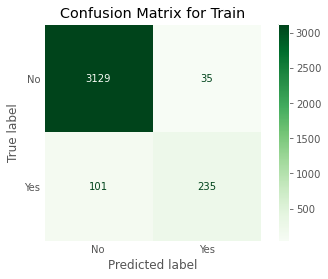

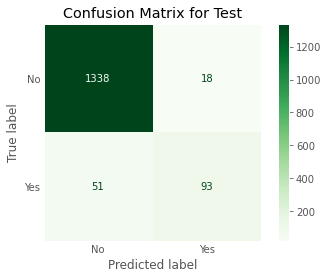

In [382]:
scores_statmodel = get_metrics_score(lg3,X_train3,X_test3,y_train,y_test,statmodel)
add_score_model(scores_statmodel)

- Logistic Regression model is giving a generalized performance on training and test set.

##### Roc -Auc curve on Train data

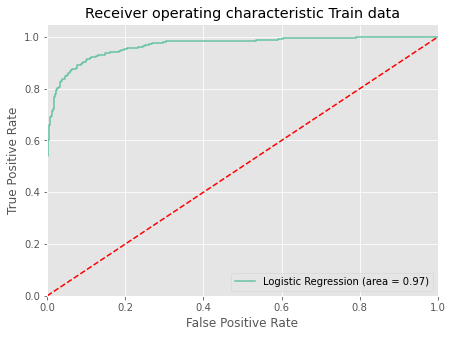

In [383]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Train data')
plt.legend(loc="lower right")
plt.show()

##### Roc -Auc curve on Test data

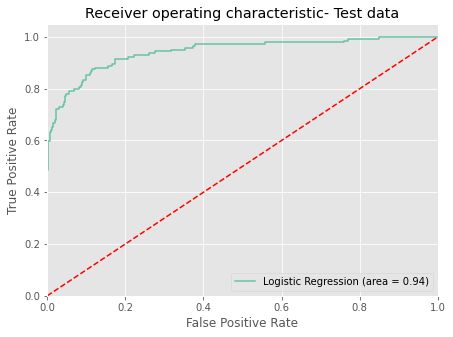

In [384]:
logit_roc_auc_test = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- Test data')
plt.legend(loc="lower right")
plt.show()

- ROC-AUC score of both training and test data are really good

#### Coefficient interpretations

* Coefficient of  Income, Education, Family,CCavg,CD account,Age,  are positive , ie a one unit  increase in these will lead to increase in chances of a person borrowing loan
* Coefficient of Securities account,online ,Credit card are negative, increase in these will lead to decrease in chances of a person borrowing a loan.

####  Converting coefficients to odds

* Odds Ratio (OR) is the odds in favor of a particular event.
* Let P be the probability of subjects affected, then  
    **Odds = P/(1-P)**
The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **OR=  exp(b)**
* Probability from the odds ratio using the formula probability = odds / (1+odds)
* The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [385]:
lgcoef = pd.DataFrame(lg3.params, columns=['coef'])
lgcoef.loc[:, "Odds Ratio"] = np.exp(lgcoef.coef)
lgcoef['Probability'] = lgcoef['Odds Ratio']/(1+lgcoef['Odds Ratio'])
lgcoef['Percentage Change of Odds']=(np.exp(lg3.params)-1)*100
lgcoef['pval']=lg3.pvalues
pd.options.display.float_format = '{:.2f}'.format
lgcoef = lgcoef.sort_values(by="Odds Ratio", ascending=False)
lgcoef

,coef,Odds Ratio,Probability,Percentage Change of Odds,pval
Income,3.10,22.23,0.96,2122.90,0.00
Education_3,2.04,7.71,0.89,671.05,0.00
Education_2,1.97,7.17,0.88,616.90,0.00
CD_Account,0.92,2.50,0.71,150.35,0.00
Family,0.69,2.00,0.67,99.78,0.00
CCAvg,0.16,1.18,0.54,17.53,0.09
Securities_Account,-0.32,0.73,0.42,-27.07,0.01
Online,-0.36,0.70,0.41,-30.01,0.00
CreditCard,-0.48,0.62,0.38,-38.38,0.00
const,-5.34,0.00,0.00,-99.52,0.00


#### Inference:

* Keeping all other factors unchanged, a one-unit increase in **Income** increases the chances of a client getting a personal loan by 22 times, or by 96%.
* Keeping all other factors unchanged, a one-unit rise in **Family** increases the chances of a consumer taking out a personal loan by 2 times or 67%.
* Holding all other factors equal, a one-unit rise in **CCAvg** increases the chances of a client getting a personal loan by 1.18 times.
* People with **CD Account** have a 2.5 times more chance of getting a loan
* People with **Education** with more than 2 years or more are 7 times more likely to take out a personal loan than undergraduate students.

**The most important variables are Income, Education, CD account, Family, and CCAvg.**

### Model performance evaluation and improvement

 MODEL PERFORMANCE
 Accuracy   : Train: 0.961  Test:  0.954
 Recall     : Train: 0.699  Test: 0.646
 Precision  : Train: 0.87  Test:  0.838
 F1         : Train: 0.776  Test: 0.729


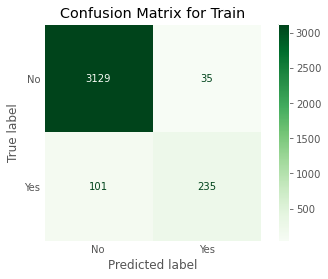

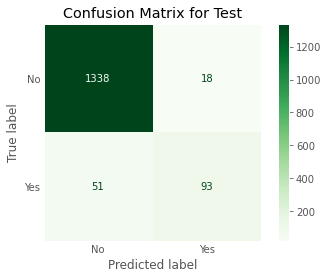

In [386]:
scores_LR = get_metrics_score(lg3,X_train3,X_test3,y_train,y_test,statmodel)

##### Inference from Confusion matrix

**True Positives:**

Reality: A customer wanted to take personal Loan. <br/>
Model Prediction: The customer will take personal loan. <br/>
Outcome: The model is good. <br/>
    
**True Negatives**:

Reality: A customer didn't wanted to take personal loan. <br/>
Model Prediction: The customer will not take personal loan. <br/>
Outcome: The business is unaffected. <br/>

**False Positives** :

Reality: A customer didn't want to take personal loan. <br/>
Model Prediction: The customer will take personal loan. <br/>
Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan. <br/>

**False Negatives**:

Reality: A customer wanted to take personal Loan. <br/>
Model Prediction: The customer will not take personal loan. <br/>
Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. The purpose of campaign was to target such customers. If team knew about this customers, they could have offered some good APR /interest rates.

Recall can be considered as the right metric to check the performance of the model <br/>
We have  recall as ***69*** on train and ***64*** on test. False negative are ***101*** and ***51*** on train and test.<br/> 
We can further improve this score  using Optimal threshold for ROC AUC curve and precision recall curve

#### Optimal threshold using AUC-ROC curve

In [387]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.0785320485036141


 MODEL PERFORMANCE
 Accuracy   : Train: 0.898  Test:  0.885
 Recall     : Train: 0.914  Test: 0.868
 Precision  : Train: 0.483  Test:  0.448
 F1         : Train: 0.632  Test: 0.591


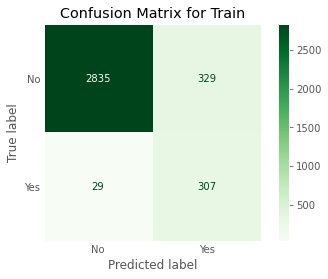

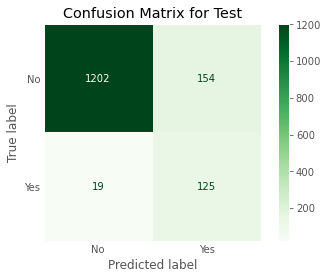

 ROC-AUC Score  :Train::  0.905  Test::  0.877


In [388]:
scores_statmodel = get_metrics_score(lg3,X_train3,X_test3,y_train,y_test,statmodel,threshold=optimal_threshold_auc_roc,roc=True)
add_score_model(scores_statmodel)

With 0.08 Threshold the Recall score has improved  from 69% to 87% on test data with 89% accuracy. 
Also False negative  values has decreased from 47 to 19 for test data. ROC-AUC score is 88 which is good.

#### Using Precision-Recall curve and see if we can find a better threshold

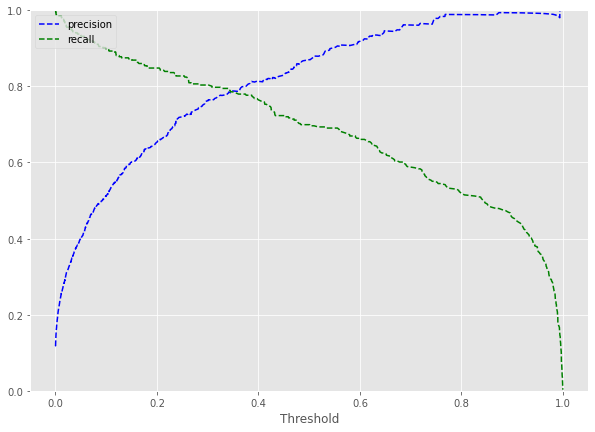

In [389]:
y_scores=lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

 MODEL PERFORMANCE
 Accuracy   : Train: 0.957  Test:  0.945
 Recall     : Train: 0.804  Test: 0.729
 Precision  : Train: 0.763  Test:  0.705
 F1         : Train: 0.783  Test: 0.717


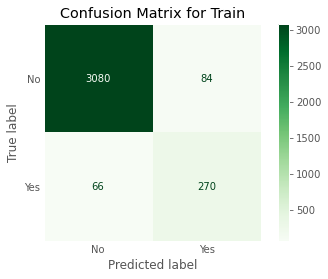

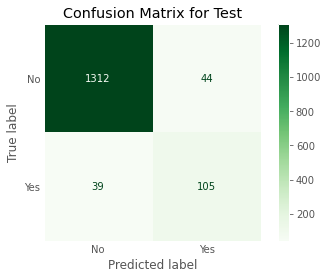

 ROC-AUC Score  :Train::  0.889  Test::  0.848


In [390]:
optimal_threshold_curve = 0.3

scores_opt_curve = get_metrics_score(lg3,X_train3,X_test3,y_train,y_test,statmodel,threshold=optimal_threshold_curve,roc=True)
add_score_model(scores_opt_curve)

With this model the False negative  cases have gone up and recall for test is 72 with 95 % accuracy.
Model is performing well on training and test set.
Model has given a balanced performance, if the bank wishes to maintain a balance between recall and precision this model can be used.
Area under the curve has decreased as compared to the initial model but the performance is generalized on training and test set.

### Using Sequential Feature Selection

In [391]:
X_train_seq=X_train_stat
X_test_seq=X_test_stat

In [392]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [393]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.lin
X_train_seq.shape

(3500, 16)

In [395]:
statmodel=0 

clf = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)

sfs1 = sfs(clf,k_features = 16,forward=True,
           floating=False, scoring= 'recall',
           verbose=2,
           cv=5)

sfs1 = sfs1.fit(X_train_seq, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s finished

[2021-07-30 18:57:37] Features: 1/16 -- score: 0.9940298507462686[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.5s finished

[2021-07-30 18:57:37] Features: 2/16 -- score: 0.9970149253731343[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.7s finished

[2021-07-30 18:57:38] Features: 3/16 -- score: 0.9970149253731343[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [396]:
statmodel=0  

clf = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)

sfs1 = sfs(clf,k_features = 11,forward=True,
           floating=False, scoring= 'recall',
           verbose=2,
           cv=5)

sfs1 = sfs1.fit(X_train_seq, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s finished

[2021-07-30 18:57:55] Features: 1/11 -- score: 0.9940298507462686[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.5s finished

[2021-07-30 18:57:55] Features: 2/11 -- score: 0.9970149253731343[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s finished

[2021-07-30 18:57:56] Features: 3/11 -- score: 0.9970149253731343[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [397]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 14]


In [398]:
X_train_seq.columns[feat_cols]

Index(['Age', 'Income', 'CCAvg', 'Mortgage', 'Securities_Account', 'Online',
       'CreditCard', 'Regions_Central', 'Regions_Los Angeles Region',
       'Regions_Southern', 'Education_2'],
      dtype='object')

#### Now we'll solely use these features to fit a sklearn model

In [399]:
X_train_final = X_train_seq[X_train_seq.columns[feat_cols]]
X_test_final = X_test_seq[X_train_final.columns]

 MODEL PERFORMANCE
 Accuracy   : Train: 0.679  Test:  0.691
 Recall     : Train: 0.997  Test: 0.972
 Precision  : Train: 0.23  Test:  0.233
 F1         : Train: 0.374  Test: 0.376


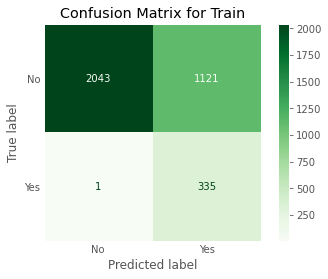

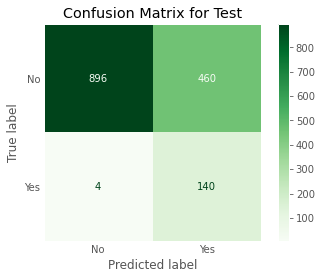

In [400]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
model  = lr.fit(X_train_final,y_train)

statmodel=0  

scores_sfs = get_metrics_score(model,X_train_final,X_test_final,y_train,y_test,statmodel)
add_score_model(scores_sfs)

In [401]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression Model- Sklearn',
                                          'Logistic Regression Model - Statsmodels',
                                          'Logistic Regression - Optimal threshold = 0.092',
                                          'Logistic Regression - Optimal threshold = 0.3',
                                          'Logistic Regression - Sequential feature selection'
                                          ],'Train_Accuracy':acc_train, 
                                          'Test_Accuracy':acc_test,
                                          'Train Recall':recall_train,
                                          'Test Recall':recall_test, 
                                          'Train Precision':precision_train,
                                          'Test Precision':precision_test,
                                          'Train F1':f1_train,
                                          'Test F1':f1_test
                                })
                                                                           
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,Logistic Regression Model- Sklearn,0.65,0.65,0.99,0.97,0.22,0.21,0.35,0.35
1,Logistic Regression Model - Statsmodels,0.96,0.95,0.70,0.65,0.87,0.84,0.78,0.73
2,Logistic Regression - Optimal threshold = 0.092,0.90,0.88,0.91,0.87,0.48,0.45,0.63,0.59
3,Logistic Regression - Optimal threshold = 0.3,0.96,0.94,0.80,0.73,0.76,0.70,0.78,0.72
4,Logistic Regression - Sequential feature selection,0.68,0.69,1.00,0.97,0.23,0.23,0.37,0.38


Since we want higher Recall with higher accuracy  Optimal Threshold 0.3 seems to be a good choice. Lets explore a model with decison tree if this score can be improved further.

## Model building using Decision Tree
* Data preparation
* Dividing data into train and test set.
* Built a CART model on the train data.
* Tune the model and prune the tree, if required.
* Test the data on test set.

In [402]:
df_loan1.drop(columns=["Agebin", "ZIPCode","County",'Experience','Income_group','Spending_group'], inplace=True)

In [404]:
X_dt = df_loan1.drop('Personal_Loan', axis=1)
y_dt = df_loan1['Personal_Loan']

In [406]:
oneHotCols=X_dt.select_dtypes(exclude='number').columns.to_list()
X_dt=pd.get_dummies(X_dt,columns=oneHotCols,drop_first=True)

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=1, stratify=y_dt)

#### Build Model
* We are using  gini index to check impurity measure in decision tree
* We use it for classification problems
* We can utilise a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1

In [407]:
def get_recall_score(model):

    ytrain_predict = model.predict(X_train_dt)
    ytest_predict = model.predict(X_test_dt)
    # accuracy on training set
    print("\x1b[0;30;47m \033[1mAccuracy : Train :\033[0m", 
          model.score(X_train_dt,y_train_dt),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          model.score(X_test_dt,y_test_dt))
# accuracy on training set
    print("\x1b[0;30;47m \033[1mRecall   : Train :\033[0m", 
          metrics.recall_score(y_train_dt,ytrain_predict),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          metrics.recall_score(y_test_dt,ytest_predict))
    make_confusion_matrix(y_train_dt,ytrain_predict,"Confusion Matric on Train Data")
    make_confusion_matrix(y_test_dt,ytest_predict,"Confusion Matric on Test Data")

 Accuracy : Train : 1.0  Test: 0.9766666666666667
 Recall   : Train : 1.0  Test: 0.8611111111111112


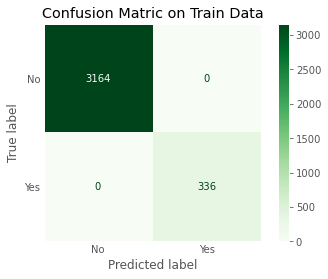

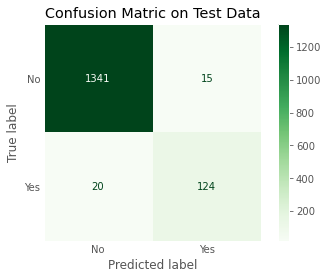

In [408]:
model = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.15,1:0.85}, random_state=1)
model.fit(X_train_dt, y_train_dt)
get_recall_score(model)


The mismatch between the Recall on Train and Test suggests that the model is overfitted, because decision trees have a tendency to overfit.

##### Processing Decision Tree

In [409]:
column_names = list(X_dt.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1', 'Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior']


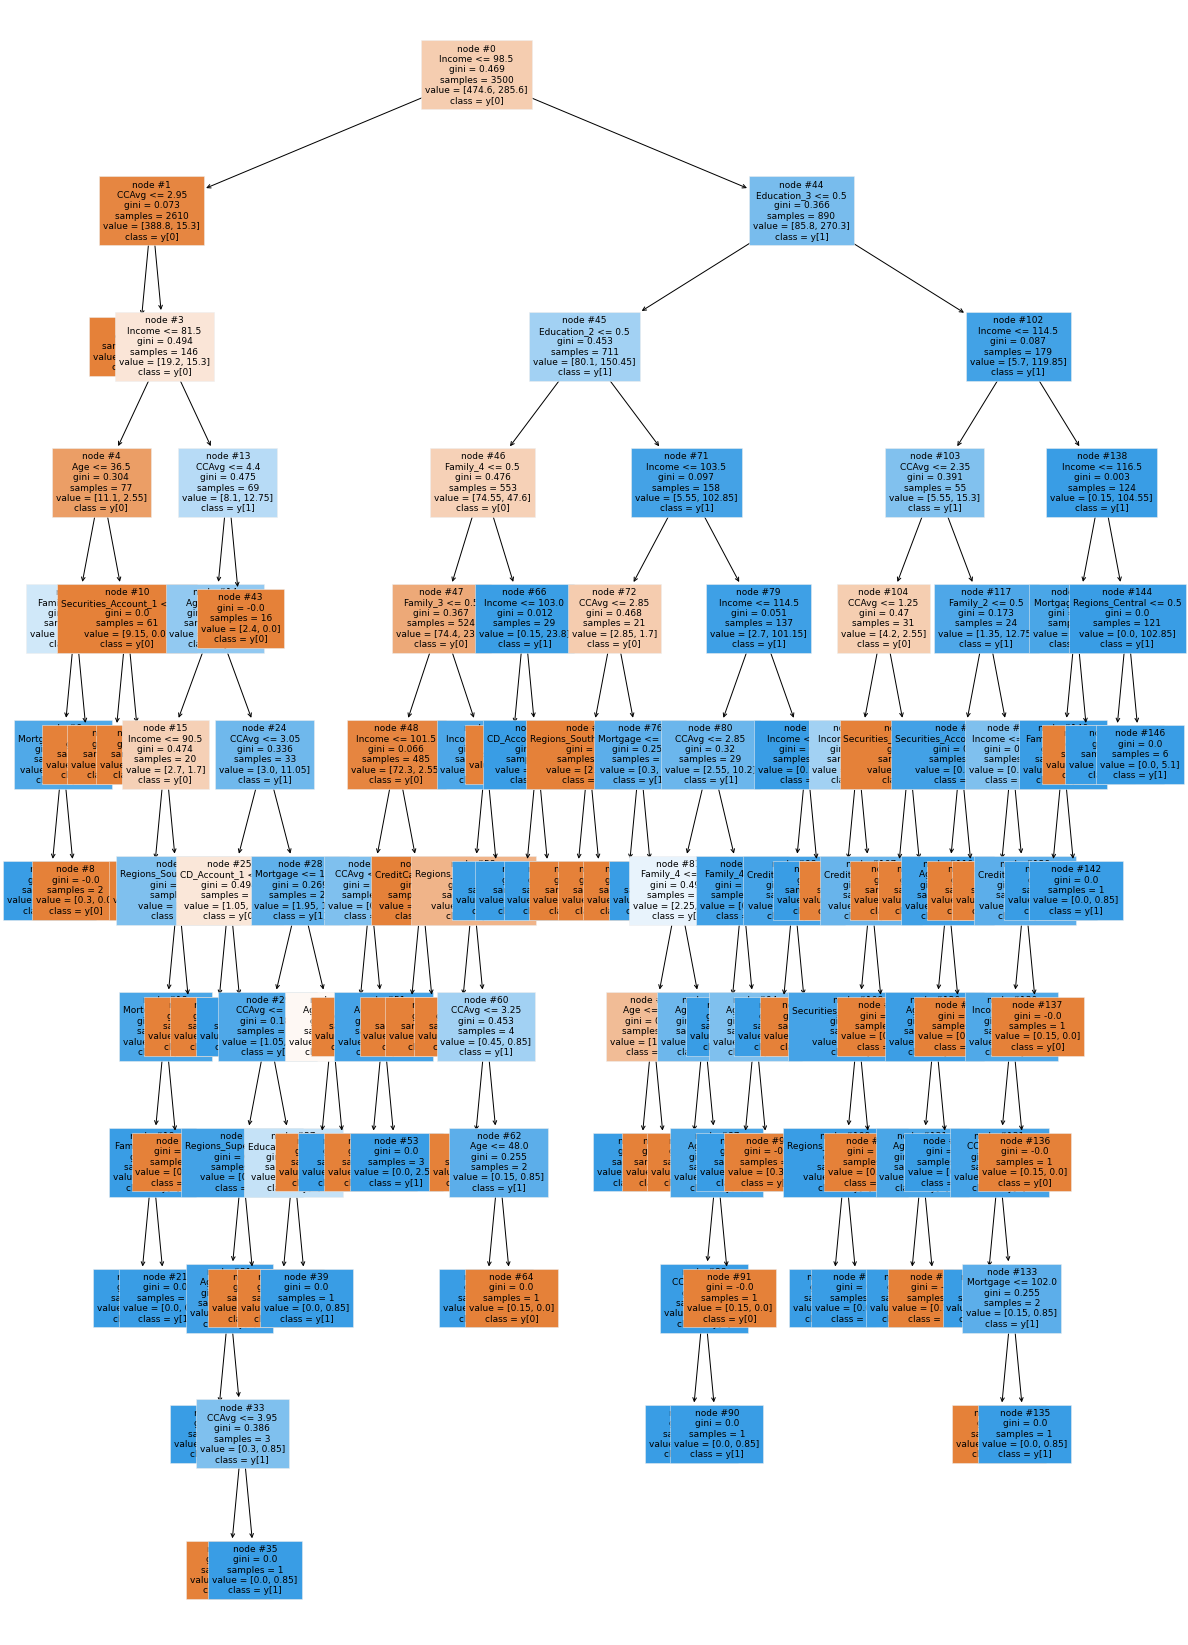

In [410]:
plt.figure(figsize=(20,30))
from sklearn import tree
from sklearn.model_selection import GridSearchCV
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [411]:
# Decision tree in the form of text

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [369.60, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- Mortgage <= 159.50
|   |   |   |   |   |   |--- weights: [0.00, 2.55] class: 1
|   |   |   |   |   |--- Mortgage >  159.50
|   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- Securities_Account_1 <= 0.50
|   |   |   |   |   |--- weights: [8.55, 0.00] class: 0
|   |   |   |   |--- Securities_Account_1 >  0.50
|   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |--- Income <= 90.50
|   |   |   |   |   |   |--- weights: [2.10, 0.00] class: 0
|   |   |   |   |   |--- Income >  90.50
|   |   | 

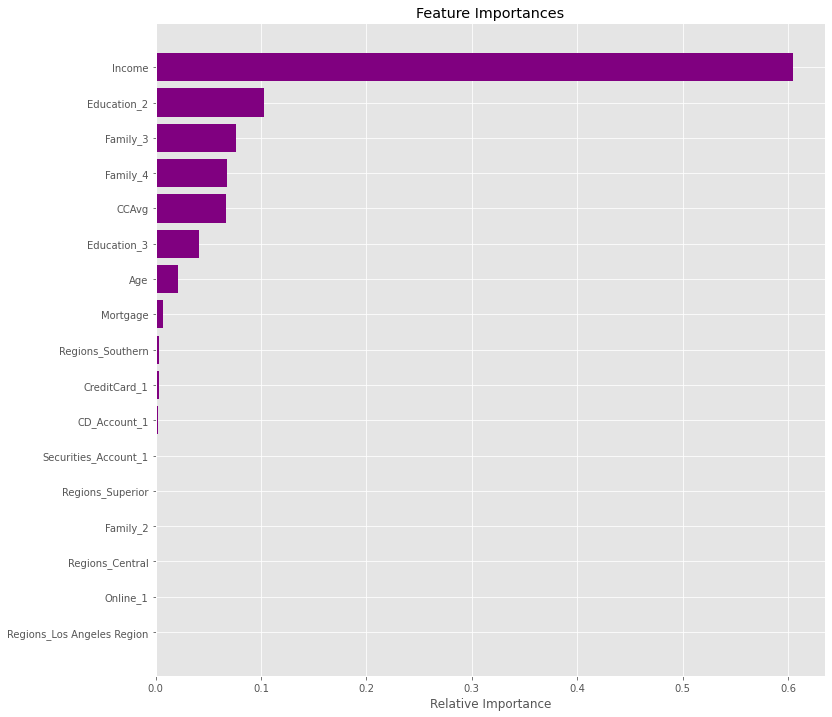

In [412]:
# Showing the most important features that are affecting the decision tree

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


#### Inference:
* We have developed the decision tree.
* Found out the top features that affect the decision tree: Income being the highest, followed by Education, Family and the average spending.

*Since we have an overfilt model, the accuracy and sensitivity of our results may not be accurate. Hence we need to perform tuning and pruning to reduce overfitting.*

**Hyperparameter Tuning using Grid Search**
* Grid Search is a process of searching the best combination of hyperparameters from a predefined set of values
* A parameter grid (Hyperparameters and corresponding values) is provided as an input to the Grid-search function.
* It tries all the combinations of the values passed and evaluates the model for each combination.
* It returns the combination of hyperparameter values that works best as per the metric provided for model evaluation 
* GridSearchCV( ) is an implementation of Grid Search with Cross Validation
* We can try to get our model to perform even better after tuning.


In [413]:
estimator = DecisionTreeClassifier(random_state=1)

# Setting parameters

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_dt, y_train_dt)

estimator = grid_obj.best_estimator_
estimator

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=20, min_samples_leaf=7,
                       random_state=1)

In [414]:
#Fitting the best algorthm to data after assigning of test data to various sections
estimator.fit(X_train_dt, y_train_dt)
ytrain_predict=estimator.predict(X_train_dt)
ytest_predict=estimator.predict(X_test_dt)

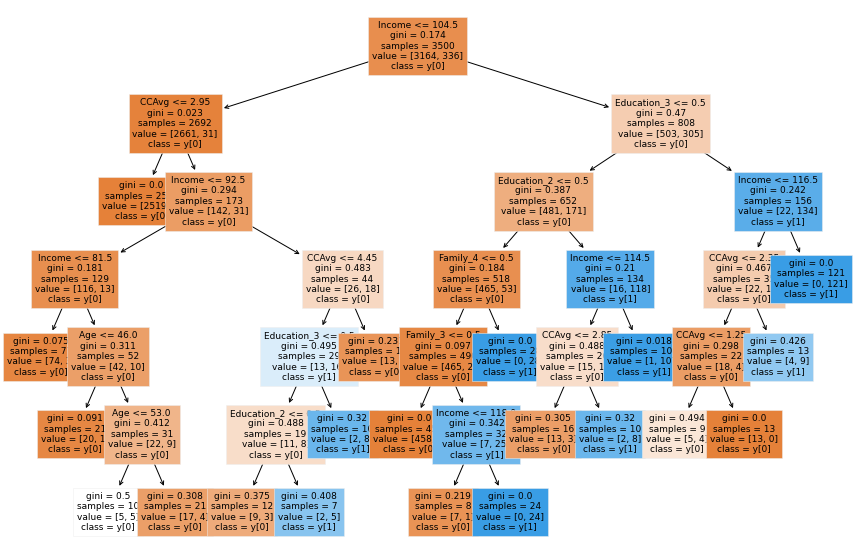

In [415]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

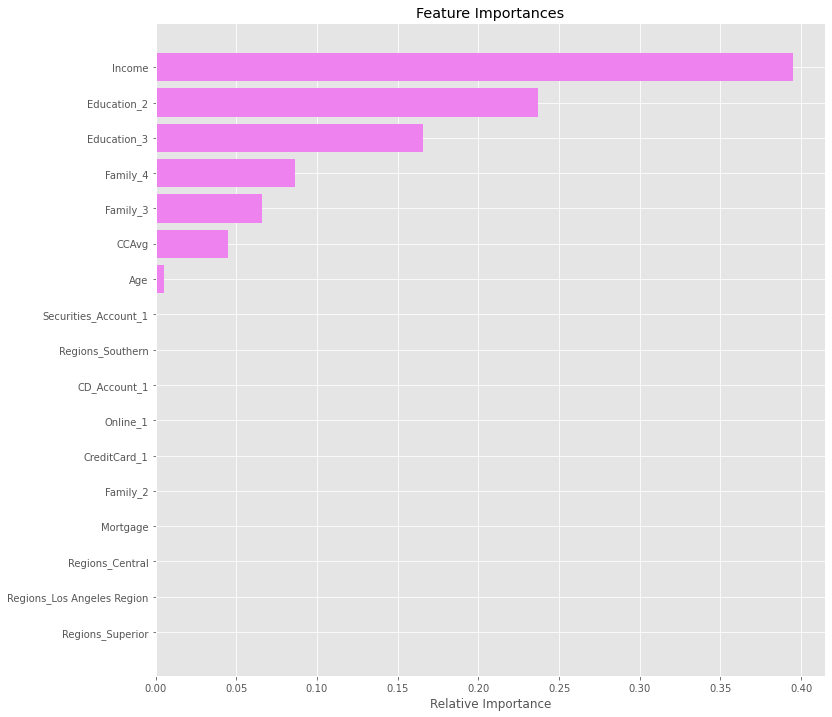

In [416]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 Accuracy : Train : 0.9894285714285714  Test: 0.978
 Recall   : Train : 0.9226190476190477  Test: 0.8402777777777778


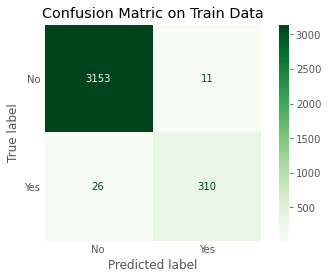

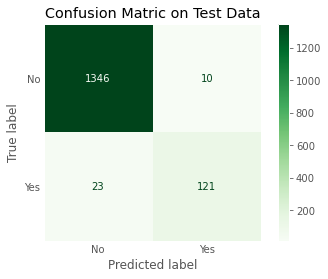

In [417]:
get_recall_score(estimator)

* Hyperparameters- max_depth=6, max_leaf_nodes=20, min_samples_leaf=7at random_state=1; Overfitting has reduced to the difference in the accuracy and recall of train data has reduced but it hasn't had much effect on the test data.
* The top features that affect the decision tree remains the same: Income being the highest, followed by Education, Family and the average spending.

With pre pruning, we get the recall for test data is 84% and the false negative is 10. We can try with post pruning whether this improves. 

### Post pruning decision trees with cost complexity pruning

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, *ccp_alpha*. **Greater values of ccp_alpha increase the number of nodes pruned.** Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores. <br/>

**Steps:**
- Starting from the Full tree, create a sequence of trees that are sequentially smaller
- At each step the algorithm 
   a. try removing each possible subtree 
   b. find the ‘relative error decrease per node’ for that subtree -

Complexity parameter,  
• And remove the subtree with the minimum <br/>
• With the list of subtrees, one usually reverts back to using cross-validation errors to find the best final pruned tree


In [418]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train_dt, y_train_dt)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

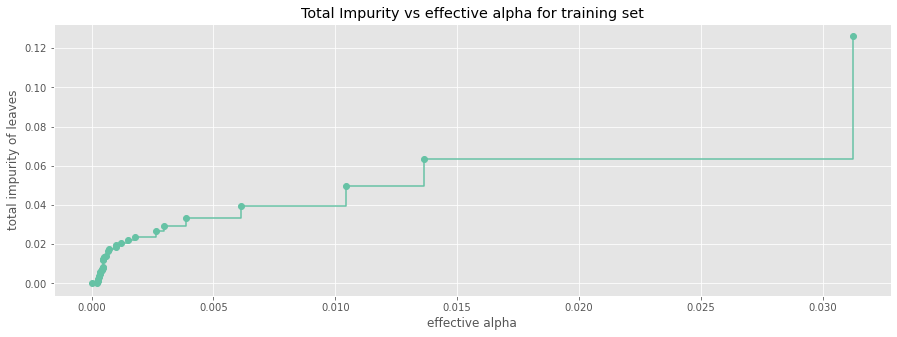

In [419]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. We will set these values of alpha and pass it to the ccp_alpha parameter of our DecisionTreeClassifier. By looping over the alphas array, we will find the accuracy on both Train and Test parts of our dataset.



In [420]:
clfs = []
accuracy_train=[]
accuracy_test=[]
recall_train=[]
recall_test=[]
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train_dt, y_train_dt)
    y_train_pred=clf.predict(X_train_dt)
    y_test_pred=clf.predict(X_test_dt)
    accuracy_train.append(clf.score(X_train_dt,y_train_dt))
    accuracy_test.append(clf.score(X_test_dt,y_test_dt))
    recall_train.append(metrics.recall_score(y_train_dt,y_train_pred))
    recall_test.append(metrics.recall_score(y_test_dt,y_test_pred))
    clfs.append(clf)
    


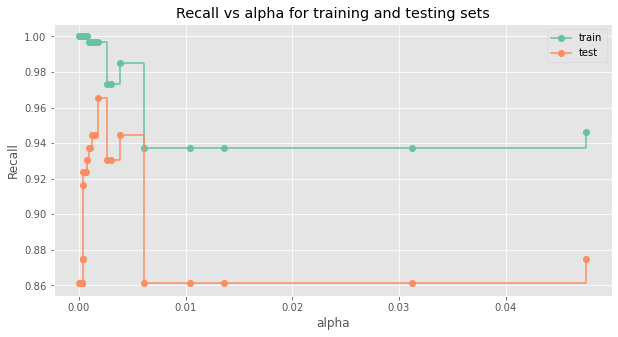

In [421]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()
   

We are gettingt a higher recall on test data between 0.002  to 0.005. Will choose alpha as **0.002.**

#### Creating model with 0.002 ccp_alpha

In [422]:
best_model = DecisionTreeClassifier(ccp_alpha=0.002,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

 Accuracy : Train : 0.9768571428571429  Test: 0.9686666666666667
 Recall   : Train : 0.9880952380952381  Test: 0.9583333333333334


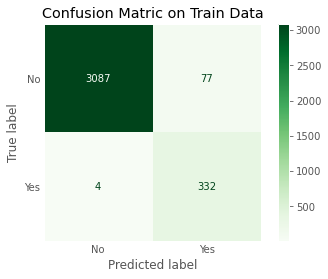

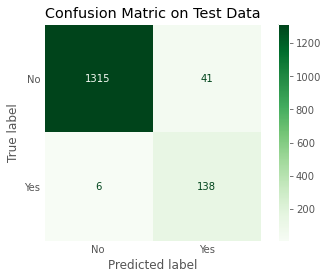

In [423]:
get_recall_score(best_model)


**The Recall on train  and  test indicate we have created a generalized model. with 96-99 % accuracy and reduced False negatives.**

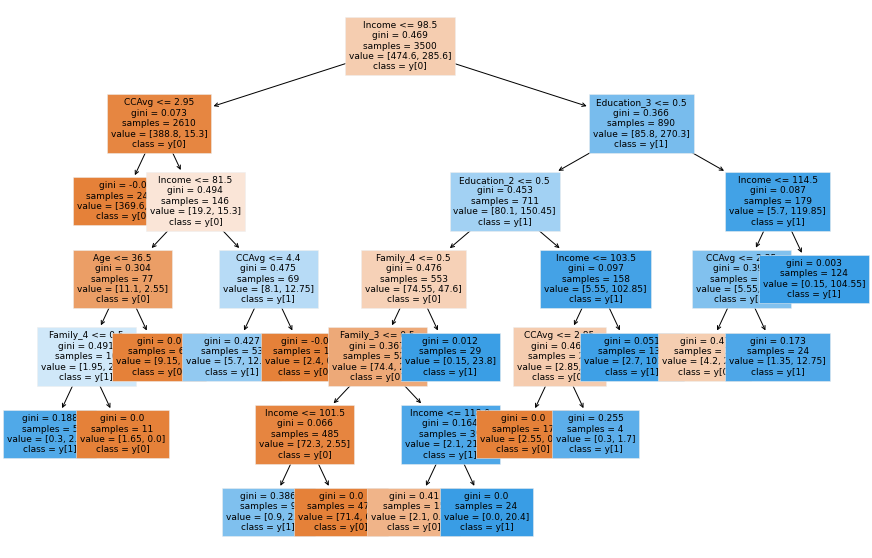

In [424]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [425]:
print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [369.60, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [0.30, 2.55] class: 1
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weights: [9.15, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- weights: [5.70, 12.75] class: 1
|   |   |   |--- CCAvg >  4.40
|   |   |   |   |--- weights: [2.40, 0.00] class: 0
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- Income <= 101.50
|   |   |   |   |   |   |--- weights: [0.90, 2.55] class: 1
|   |   |   |   |   |--- Income >  101.50
|   |   |   |   |   |   |--- weights: [71.40, 0.00] class: 0
| 

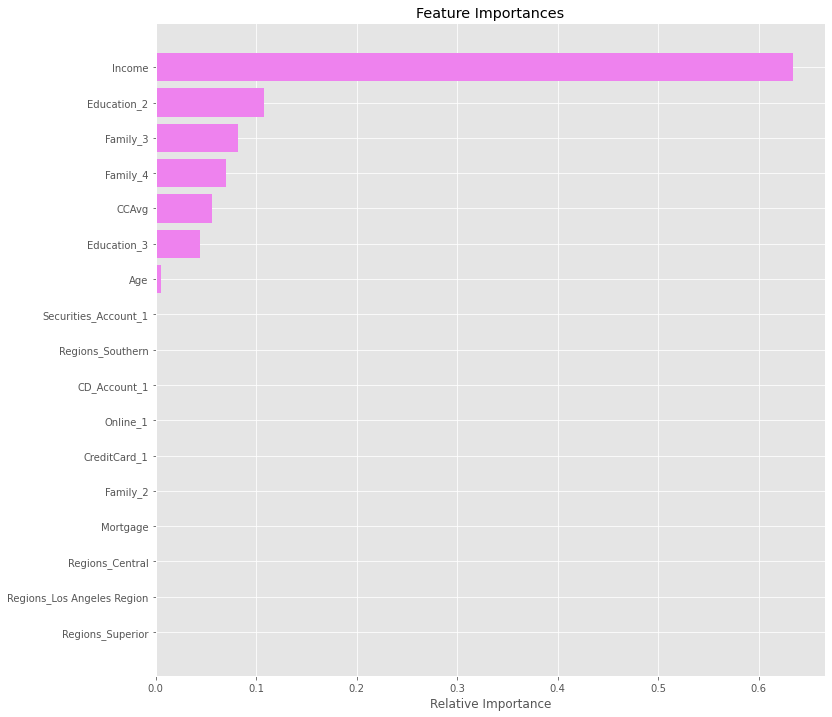

In [426]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1356
           1       0.77      0.96      0.85       144

    accuracy                           0.97      1500
   macro avg       0.88      0.96      0.92      1500
weighted avg       0.97      0.97      0.97      1500



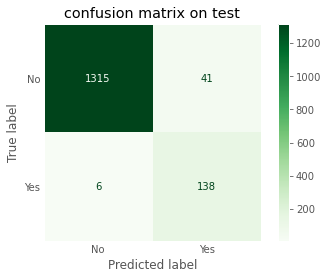

In [429]:
y_pred = best_model.predict(X_test_dt)
print(classification_report(y_test_dt,y_pred))
make_confusion_matrix(y_test,y_pred,"confusion matrix on test")

Inference:

- The Recall on train  and test indicate we have created a generalized model. with 96-99 % accuracy and reduced False  negatives.
- Top features remained the same: Income, Education, Family member  3 and 4, Average spending, and Age.
- This is the best model as false negative is only 6 on Testdata.


##### Comparing all the models based on Model Performance

In [427]:
comparison_frame = pd.DataFrame({'Model':['Logisitic Regression with Optimal Threshold 0.104',
                                          'Initial decision tree model',
                                          'Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 
                                          'Train_accuracy':[0.92,1,0.99,0.98],
                                          'Test_accuracy':[0.91,0.98,0.98,0.97],
                                          'Train_Recall':[0.90,1,0.92,0.98], 
                                          'Test_Recall':[0.88,0.86,0.84,0.96]})  

comparison_frame

,Model,Train_accuracy,Test_accuracy,Train_Recall,Test_Recall
0,Logisitic Regression with Optimal Threshold 0.104,0.92,0.91,0.90,0.88
1,Initial decision tree model,1.00,0.98,1.00,0.86
2,Decision treee with hyperparameter tuning,0.99,0.98,0.92,0.84
3,Decision tree with post-pruning,0.98,0.97,0.98,0.96


Comparing all the models that were developed, we can see that the **decision tree with post pruning** had the least overfitting model with accuracy and recall almost in the range of 96 to 99%. 
The top features we got from this model were Income and Education.

*******************************************************************************************************************************

# Conclusion

* Firstly we analysed the data in hand and understood the data and the types. 
* Performed a Pre Processing and converted zip codes to counties and furthermore to regions, fixed data types, and processesed the few variables. 
* An EDA on the data was done after pre processing including- univariate analysis, bivariate and multi variate analysis and we found out:
    * Customers who have chosen a loan have a higher average monthly credit consumption.
    * The majority of consumers who had a personal loan with the bank took advantage of the bank's online services.
    * Customers with a family of three had taken out loans from the bank.
    * The majority of consumers who have previously taken out a personal loan are from the Los Angeles area.
    * Personal loans had previously been used by people with higher income.
    * Customers aged 30 and under, as well as those aged 60 and up, have a high borrowing loan ratio.
    * People with large mortgages took out loans.
    * Customers who possessed a bank certificate of deposit had previously taken out a loan.
* Firstly, we created a model using Logistic Regression, with Recall as the performance metric. *Income, education, CD account, family, and CCAvg* were the most essential variables for classification.
* Coefficient of Income, Graduate and Advanced Education, Family_3,Family 4,CCavg,CD account,Age, are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan
* Coefficient of Securities account,online ,Family_2 credit card are negative increase in these will lead to decrease in chances of a person borrowing a loan.
* By using different models like Logistic Regression and Decision Tree Classifier to build a likelihood of Customer buying Loan.
* We also improved the performance using  ROC-AUC curve and optimal threshold .This was best model with high recall and accuracy 
* We used decision trees  with prepruning and post pruning. The Post pruning model gave 96 % recall with 97% accuracy on test data.
* Income, graduate degree customers, customers having 3 family members are some of the most important variables in predicting if the customers will purchase a personal loan.

*******************************************************************************************************************************

### Recommendation 

- Decision trees doesn't require to much data preparation or handling of outliers like logistic regression. They are easy to understand. Decision tress can easily overfit , so we have to be careful using decision tree.
- Based on EDA, logistic Regression , Decision tree , Income ,Educatoin,Family,CCavg are most  important factor.
- Customers who have income above 98k dollars , Advance/graduate level education, a family of more than 2, such customers have higher chances of taking personal loans.
- So for this campaign we can have different profiles for customers.
- `High Profile Clients` :-Higher income,Advanced/Graduate level education, 3 /4 Family members,high spending
- `Average Profile` :- Medium income  group,Graduate level education.3/4Family members,medium spending
- `Low Profile`:-Lower income group,undergrads ,3/4Family Member,low spending
-  Customer Average Spending and Mortages can also be looked upon as based on EDA and logistic Regression this parameters also play some role in likelihood of buy loan.
- We can 1st  target high profile customers , by providing them with a personal relationship managers who can address there concerns and  can pursue them to buy loan from the bank with completive interest rates.
- Prequalifying for Loan can also attract more customers.
- Our 2nd target would be Medium profile customers. 
- The model cannot identify  well if there are some exceptional cases when low profile customer is ready to buy a personal  loan.
